In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read data
data_name = "DataCognitive_Task2.csv"
df = pd.read_csv(data_name)
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0         sbj     stm        rt key  pos uhnd hndns eye sex   age  \
0           0  8101004202  50.bmp  3.825690   p  1.0    r     r   r   m  22.0   
1           1  8101004202  60.bmp  2.733858   p  7.0    r     r   r   m  22.0   
2           2  8101004202  60.bmp  1.618684   p  2.0    r     r   r   m  22.0   

   edu  size  
0  2.0   NaN  
1  2.0   NaN  
2  2.0   NaN

In [3]:
df.dtypes

Unnamed: 0      int64
sbj            object
stm            object
rt            float64
key            object
pos           float64
uhnd           object
hndns          object
eye            object
sex            object
age           float64
edu           float64
size          float64
dtype: object

In [4]:
df.shape

(121695, 13)

#  Cleaning the Data

fix std# 810100376 rt

In [5]:
df.loc[71144:73015]['rt'] = df.loc[71144:73015]['rt']/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


remove Null and empty

In [6]:
df[['sbj',	'stm',	'rt',	'key',	'pos',	'uhnd',	'hndns',	'eye',	'sex',	'age',	'edu']].replace('', np.nan, inplace=True)
df.dropna(subset=['sbj',	'stm',	'rt',	'key',	'pos',	'uhnd',	'hndns',	'eye',	'sex',	'age',	'edu'], inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


(119923, 13)

Finding outliers using the inter-quartile range (IQR) of reaction times

In [7]:
Q1 = df['rt'].quantile(0.25)
Q3 = df['rt'].quantile(0.75)
IQR = Q3 - Q1
outliers1 = df[df['rt'] < Q1 - 1.5 * IQR]
outliers2 = df[df['rt'] > Q3 + 1.5 * IQR]
outliers = outliers1.append(outliers2, ignore_index=True)
outliers['sbj'].unique()

array([8106973112, 8101991002, 8101005262, 8101005062, 8101991001,
       8101003011, 8101005061, 8101003611, 8101003551, 8101976832,
       '8101000634', '810100045', '8101990402', '810100044', '8101000193',
       '8101993412', '8101003013', '8101003793', '8101000631', 8101004202,
       8101004201, 8101005022, 8101990531, 8101000195, 8101993411,
       8106973111, 8101000192, 8101993502, 8101976831, 8101991612,
       8101005023, 8101000194, 8101003762, 8101991611, 8101981632,
       8101003281, 8101004762, 8101992522, 8101004761, 8101990532,
       8101004121, 8101992521, 8101005021, 8101005261, '8101003283',
       '8101000635', '8101004764', '8101003761', '8101981631',
       '8101004203', '8101992751', '8101004763.0', '8101003552',
       '8101003792', '8101992752', '8101003012', '8101003612',
       '8101990401', '8101993501', '8101000191', '8101000633',
       '8101003282', '8101003791', '8101004122', '8101000632'],
      dtype=object)

In [8]:
df = df.query('(@Q1 - 1.5 * @IQR) <= rt <= (@Q3 + 1.5 * @IQR)')
df.shape

(110957, 13)

In [9]:
df[df['uhnd']=="I"]["sbj"].unique()

array(['8101000635', '8101000634', '8101000631', '8101000633',
       '8101000632'], dtype=object)

In [10]:
df['uhnd'] = np.where((df['key'] == 'q')|(df['key'] == 'w')|(df['key'] == 'Q')|(df['key'] == 'W'),'l','r')
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(110957, 13)

In [11]:
df['uhnd'] = np.where(df['uhnd']=='r','r','l')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


find position values from 0 to 12 and fix to 1 to 13

In [12]:
ids = df[df['pos'] == 0]['sbj'].unique()
for x in ids:
    df['pos'] = np.where(df['sbj'] == x,df['pos'] + 1,df['pos'])
df['pos'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([10.,  6.,  9.,  1., 13.,  2.,  4., 12.,  5.,  8., 11.,  3.,  7.])

In [13]:
ids

array([8101000195, 8101000192, 8101000194, '8101000193', '8101000191'],
      dtype=object)

In [14]:
df.dtypes

Unnamed: 0      int64
sbj            object
stm            object
rt            float64
key            object
pos           float64
uhnd           object
hndns          object
eye            object
sex            object
age           float64
edu           float64
size          float64
dtype: object

In [15]:
df[df['stm'].str.contains("Supplementary Material/")]['sbj'].unique()

array(['8101000634', '8101000631', '8101000633'], dtype=object)

In [16]:
df['stm'].str.replace("Supplementary Material/" ,"")

3         50.bmp
5         70.bmp
6         50.bmp
7         80.bmp
8         80.bmp
           ...  
121690    50.bmp
121691    70.bmp
121692     0.bmp
121693    70.bmp
121694    30.bmp
Name: stm, Length: 110957, dtype: object

### Exploring the Data

#### adding requied variables

add log rt and accuracy

In [17]:
df2 = df[['sbj',	'stm',	'rt',	'key',	'pos',	'uhnd',	'hndns',	'eye',	'sex',	'age',	'edu']]
df2['rt'] = df2['rt']*1000
df2['lrt'] = np.log(df2['rt'])
tmp = df2[df2['stm'] != '40.bmp']
tmp['ans'] = np.where((tmp['stm']=='60.bmp') | (tmp['stm']=='70.bmp') | (tmp['stm']=='50.bmp') |  (tmp['stm']=='80.bmp'), 'f','m')
tmp['corr'] = np.where((((tmp['key'] == 'w') | (tmp['key'] == 'W') | (tmp['key'] == 'P') | (tmp['key'] == 'p') ) & (tmp['ans']=='m')) | (((tmp['key'] == 'q') | (tmp['key'] == 'Q') | (tmp['key'] == 'O') | (tmp['key'] == 'o') ) & (tmp['ans']=='f')) ,1,0)
acc = (tmp.groupby(['sbj']).sum()['corr']/tmp.groupby(['sbj']).count()['corr']).reset_index(name ='acc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [18]:
df2 = pd.merge(df2, acc, on='sbj')
df2

sbj     stm           rt key   pos uhnd hndns eye sex   age  \
0       8101004202  50.bmp   925.664400   o  10.0    r     r   r   m  22.0   
1       8101004202  70.bmp  1163.995200   o   6.0    r     r   r   m  22.0   
2       8101004202  50.bmp  1023.111800   o   9.0    r     r   r   m  22.0   
3       8101004202  80.bmp  1273.948100   p   1.0    r     r   r   m  22.0   
4       8101004202  80.bmp   970.425000   o  10.0    r     r   r   m  22.0   
...            ...     ...          ...  ..   ...  ...   ...  ..  ..   ...   
110952  8101000632  50.bmp   454.452038   w  13.0    l     r   r   m  28.0   
110953  8101000632  70.bmp   345.216036   q   1.0    l     r   r   m  28.0   
110954  8101000632   0.bmp   395.338058   w  11.0    l     r   r   m  28.0   
110955  8101000632  70.bmp   416.251898   q   7.0    l     r   r   m  28.0   
110956  8101000632  30.bmp   303.602934   q   7.0    l     r   r   m  28.0   

        edu       lrt       acc  
0       2.0  6.830512  0.608108  
1       2.0  7.059614  0.608108  
2       2.0  6.930604  0.608108  
3       2.0  7.149876  0.608108  
4       2.0  6.877734  0.608108  
...     ...       ...       ...  
110952  2.0  6.119092  0.474306  
110953  2.0  5.844170  0.474306  
110954  2.0  5.979741  0.474306  
110955  2.0  6.031291  0.474306  
110956  2.0  5.715721  0.474306  

[110957 rows x 13 columns]

In [19]:
df2['loc'] = df2['pos'].astype(int)

add ecc

In [20]:
df2['ecc'] = np.where((df2['pos']==1) , 0,np.where((df2['pos']<8) , 1,2))
df2['ecc']

0         2
1         1
2         2
3         0
4         2
         ..
110952    2
110953    0
110954    2
110955    1
110956    1
Name: ecc, Length: 110957, dtype: int64

add VF

In [21]:
df2['vf'] = np.where((df2['pos']==1) , 0,np.where((df2['pos']==2) | (df2['pos']==8) | (df2['pos']==3), 1,np.where((df2['pos']==3) | (df2['pos']==4) | (df2['pos']==5), 2,np.where((df2['pos']==5) | (df2['pos']==10) | (df2['pos']==11), 3,4))))
df2['vf']

0         3
1         4
2         4
3         0
4         3
         ..
110952    4
110953    0
110954    3
110955    4
110956    4
Name: vf, Length: 110957, dtype: int64

dominant hand is used or not?

In [22]:
df2['dhand'] = np.where(df2['uhnd']==df2['hndns'],1,0)
df2['dhand']

0         1
1         1
2         1
3         1
4         1
         ..
110952    0
110953    0
110954    0
110955    0
110956    0
Name: dhand, Length: 110957, dtype: int64

In [23]:
df2 = df2[['sbj','rt','lrt','acc','loc','ecc','vf','uhnd','dhand','sex','hndns','eye']]
df2

sbj           rt       lrt       acc  loc  ecc  vf uhnd  dhand  \
0       8101004202   925.664400  6.830512  0.608108   10    2   3    r      1   
1       8101004202  1163.995200  7.059614  0.608108    6    1   4    r      1   
2       8101004202  1023.111800  6.930604  0.608108    9    2   4    r      1   
3       8101004202  1273.948100  7.149876  0.608108    1    0   0    r      1   
4       8101004202   970.425000  6.877734  0.608108   10    2   3    r      1   
...            ...          ...       ...       ...  ...  ...  ..  ...    ...   
110952  8101000632   454.452038  6.119092  0.474306   13    2   4    l      0   
110953  8101000632   345.216036  5.844170  0.474306    1    0   0    l      0   
110954  8101000632   395.338058  5.979741  0.474306   11    2   3    l      0   
110955  8101000632   416.251898  6.031291  0.474306    7    1   4    l      0   
110956  8101000632   303.602934  5.715721  0.474306    7    1   4    l      0   

       sex hndns eye  
0        m     r   r  
1        m     r   r  
2        m     r   r  
3        m     r   r  
4        m     r   r  
...     ..   ...  ..  
110952   m     r   r  
110953   m     r   r  
110954   m     r   r  
110955   m     r   r  
110956   m     r   r  

[110957 rows x 12 columns]

In [24]:
df2.dtypes

sbj       object
rt       float64
lrt      float64
acc      float64
loc        int64
ecc        int64
vf         int64
uhnd      object
dhand      int64
sex       object
hndns     object
eye       object
dtype: object

### Prediction of Behavioral Characteristics

##### add numeric variables

In [25]:
df3 = df2
df3.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

  hndns eye  
0     r   r  
1     r   r  
2     r   r

In [26]:
locations = df3['loc'].unique()
for loc in locations:
    df3['loc'+str(loc)] = np.where((df3['loc']==loc),1,0)
df3.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... loc1 loc13  loc2  loc4  loc12  loc5  loc8  loc11  loc3  loc7  
0  ...    0     0     0     0      0     0     0      0     0     0  
1  ...    0     0     0     0      0     0     0      0     0     0  
2  ...    0     0     0     0      0     0     0      0     0     0  

[3 rows x 25 columns]

In [27]:
listecc = df3['ecc'].unique()
for ecc in listecc:
    df3['ecc'+str(ecc)] = np.where((df3['ecc']==ecc),1,0)
df3.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... loc4 loc12  loc5  loc8  loc11  loc3  loc7  ecc2  ecc1  ecc0  
0  ...    0     0     0     0      0     0     0     1     0     0  
1  ...    0     0     0     0      0     0     0     0     1     0  
2  ...    0     0     0     0      0     0     0     1     0     0  

[3 rows x 28 columns]

In [28]:
listvf = df3['vf'].unique()
for vf in listvf:
    df3['vf'+str(vf)] = np.where((df3['vf']==vf),1,0)
df3.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... loc3 loc7  ecc2  ecc1  ecc0  vf3  vf4  vf0  vf1  vf2  
0  ...    0    0     1     0     0    1    0    0    0    0  
1  ...    0    0     0     1     0    0    1    0    0    0  
2  ...    0    0     1     0     0    0    1    0    0    0  

[3 rows x 33 columns]

In [29]:
booleanparams = ['sex', 'uhnd', 'hndns', 'eye']
for param in booleanparams:
    listp = df3[param].unique()
    for p in listp:
        df3[param+str(p)] = np.where((df3[param]==p),1,0)
df3.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... vf1 vf2  sexm  sexf  uhndr  uhndl  hndnsr  hndnsl  eyer  eyel  
0  ...   0   0     1     0      1      0       1       0     1     0  
1  ...   0   0     1     0      1      0       1       0     1     0  
2  ...   0   0     1     0      1      0       1       0     1     0  

[3 rows x 41 columns]

In [30]:
df3['vf2,loc5'] = df3['vf2']*df3['loc5']
df3['sexm,loc11'] = df3['sexm']*df3['loc11']
df3['sexm,loc9'] = df3['sexm']*df3['loc9']
df3['sexm,uhndr'] = df3['sexm']*df3['uhndr']
df3['hndnsr,uhndr'] = df3['hndnsr']*df3['uhndr']
df3['hndnsr,eyer'] = df3['hndnsr']*df3['eyer']
df3['sexm,eyer'] = df3['sexm']*df3['eyer']
df3.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... hndnsl eyer  eyel  vf2,loc5  sexm,loc11  sexm,loc9  sexm,uhndr  \
0  ...      0    1     0         0           0          0           1   
1  ...      0    1     0         0           0          0           1   
2  ...      0    1     0         0           0          1           1   

   hndnsr,uhndr  hndnsr,eyer  sexm,eyer  
0             1            1          1  
1             1            1          1  
2             1            1          1  

[3 rows x 48 columns]

### Psychometric Fitting

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
df4 = df
df4['ans'] = np.where((df4['key']=='p')|(df4['key']=='P')|(df4['key']=='w')|(df4['key']=='W'),0,1)

In [33]:
df4 = df[['sbj',	'stm',	'rt',	'key',	'pos',	'uhnd',	'hndns',	'eye',	'sex',	'age',	'edu']]
df4['rt'] = df4['rt']*1000
df4['lrt'] = np.log(df4['rt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df4['loc'] = df4['pos'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df4['ecc'] = np.where((df4['pos']==1) , 0,np.where((df4['pos']<8) , 1,2))
df4['ecc']

3         2
5         1
6         2
7         0
8         2
         ..
121690    2
121691    0
121692    2
121693    1
121694    1
Name: ecc, Length: 110957, dtype: int64

In [36]:
df4['vf'] = np.where((df4['pos']==1) , 0,np.where((df4['pos']==2) | (df4['pos']==8) | (df4['pos']==3), 1,np.where((df4['pos']==3) | (df4['pos']==4) | (df4['pos']==5), 2,np.where((df4['pos']==5) | (df4['pos']==10) | (df4['pos']==11), 3,4))))
df4['vf']

3         3
5         4
6         4
7         0
8         3
         ..
121690    4
121691    0
121692    3
121693    4
121694    4
Name: vf, Length: 110957, dtype: int64

In [37]:
df4['dhand'] = np.where(df4['uhnd']==df4['hndns'],1,0)
df4['dhand']

3         1
5         1
6         1
7         1
8         1
         ..
121690    0
121691    0
121692    0
121693    0
121694    0
Name: dhand, Length: 110957, dtype: int64

In [38]:
df4['ans'] = np.where((df4['key']=='p')|(df4['key']=='P')|(df4['key']=='w')|(df4['key']=='W'),0,1)
df4.head(4)

sbj     stm         rt key   pos uhnd hndns eye sex   age  edu  \
3  8101004202  50.bmp   925.6644   o  10.0    r     r   r   m  22.0  2.0   
5  8101004202  70.bmp  1163.9952   o   6.0    r     r   r   m  22.0  2.0   
6  8101004202  50.bmp  1023.1118   o   9.0    r     r   r   m  22.0  2.0   
7  8101004202  80.bmp  1273.9481   p   1.0    r     r   r   m  22.0  2.0   

        lrt  loc  ecc  vf  dhand  ans  
3  6.830512   10    2   3      1    1  
5  7.059614    6    1   4      1    1  
6  6.930604    9    2   4      1    1  
7  7.149876    1    0   0      1    0

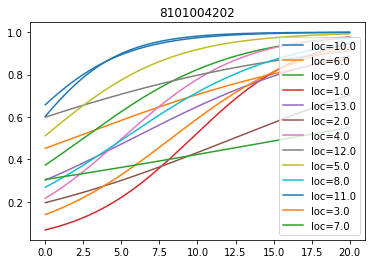

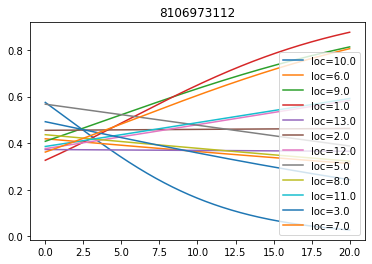

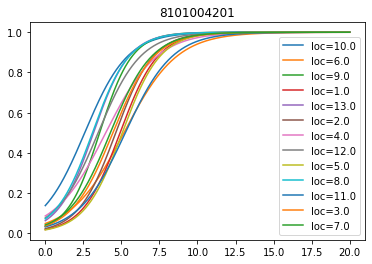

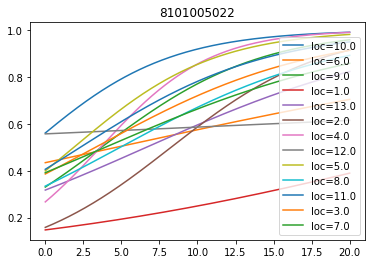

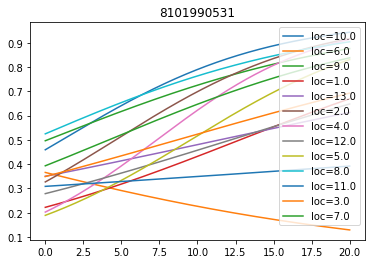

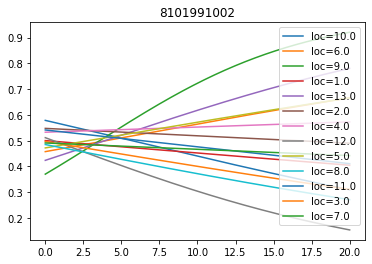

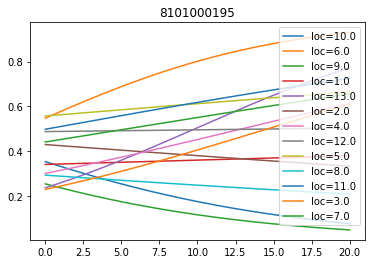

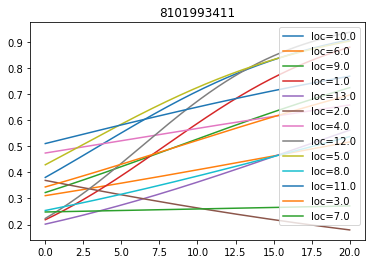

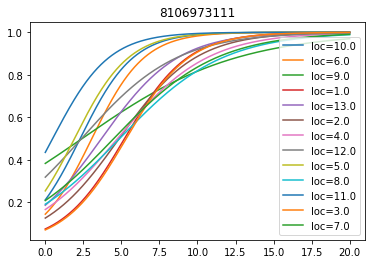

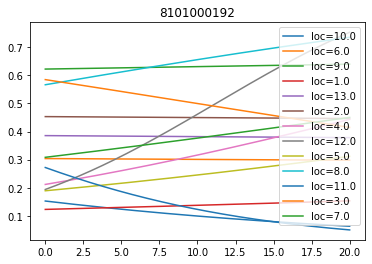

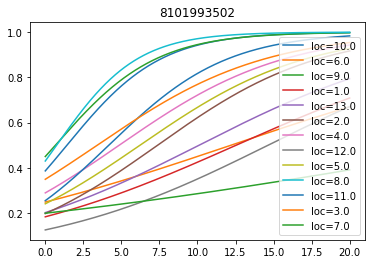

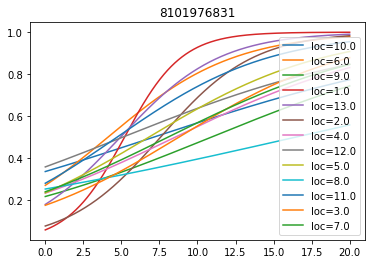

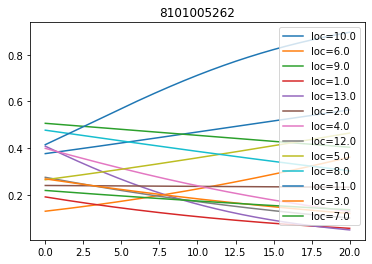

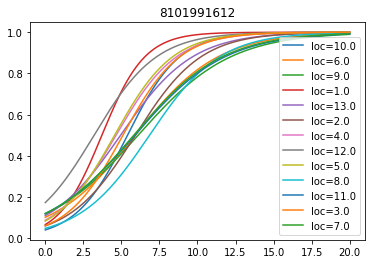

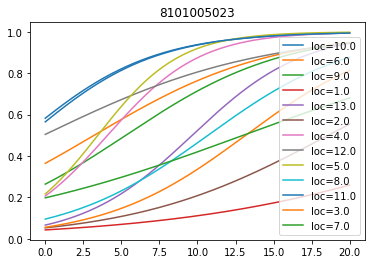

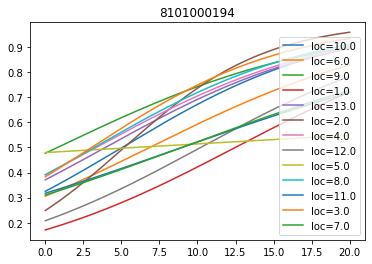

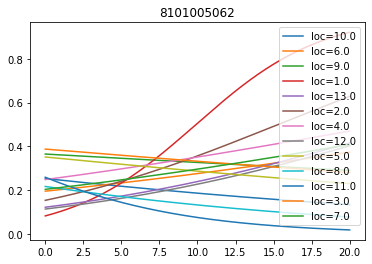

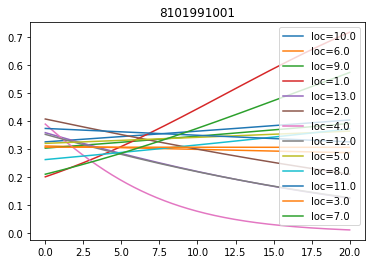

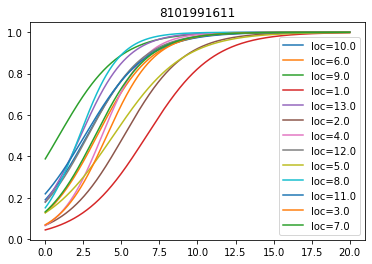

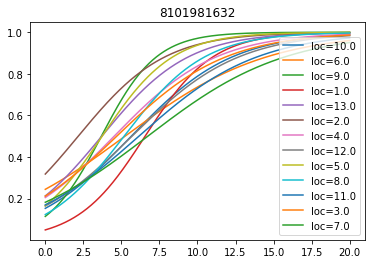

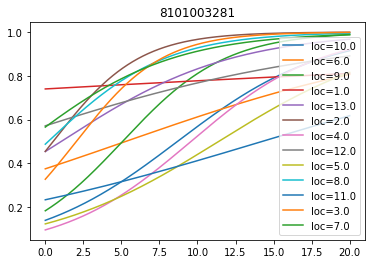

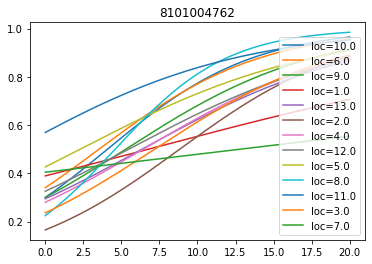

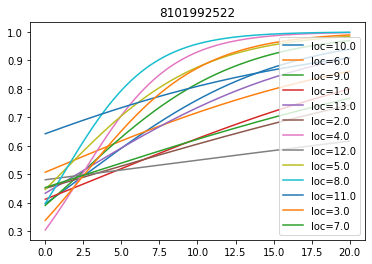

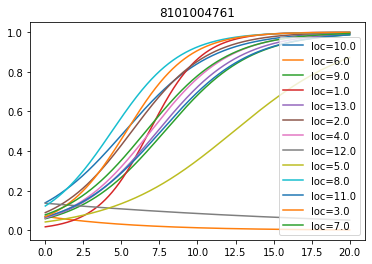

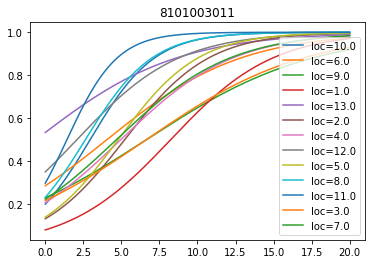

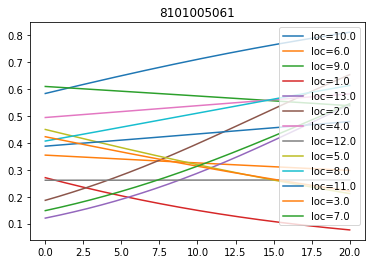

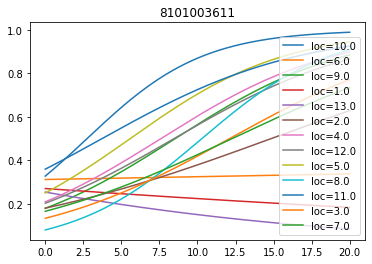

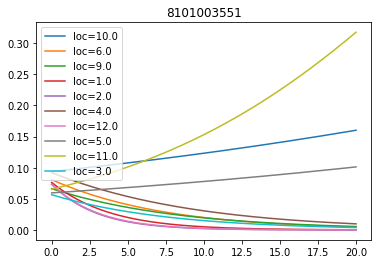

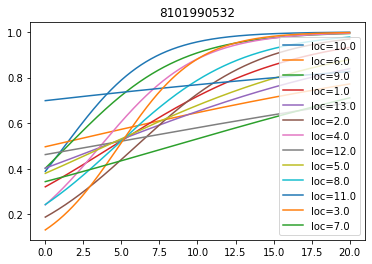

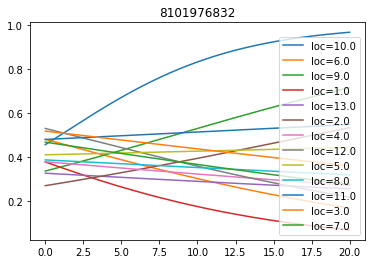

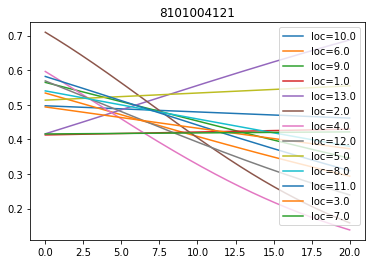

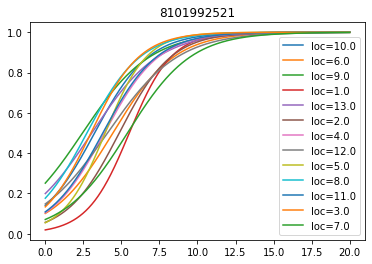

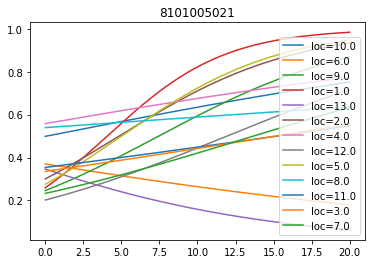

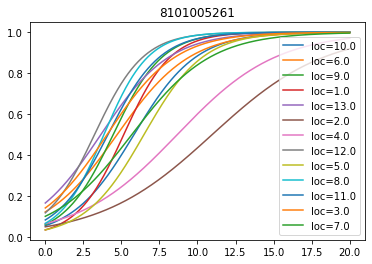

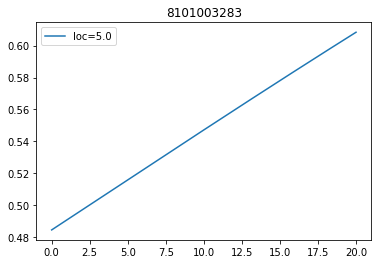

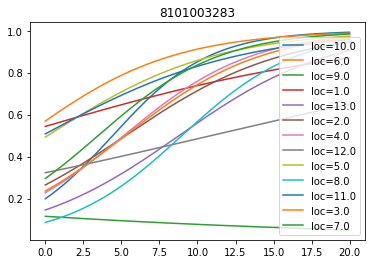

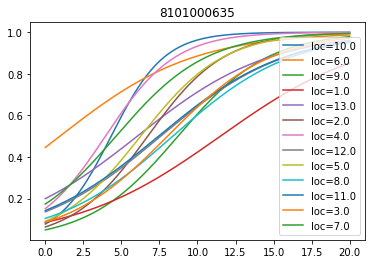

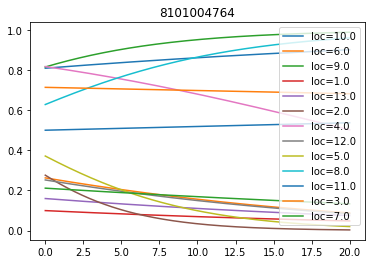

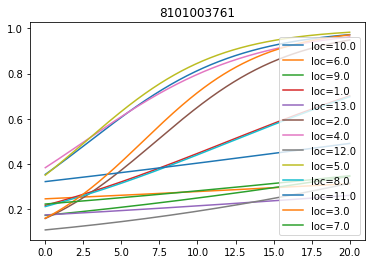

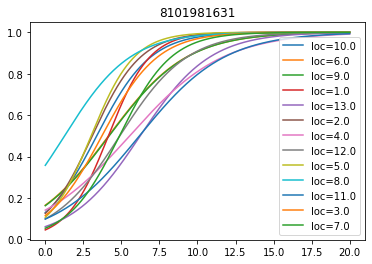

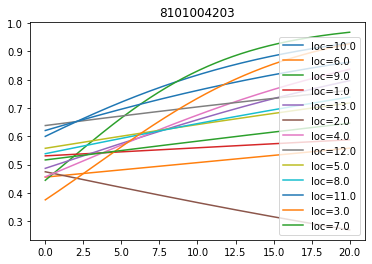

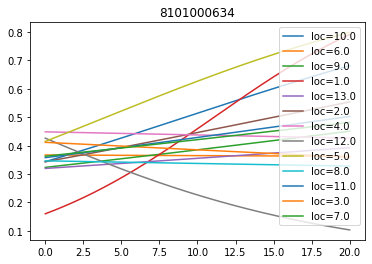

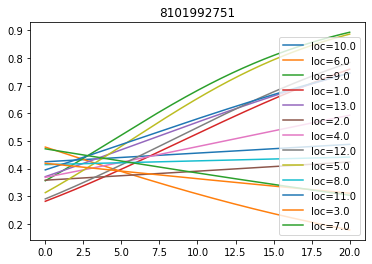

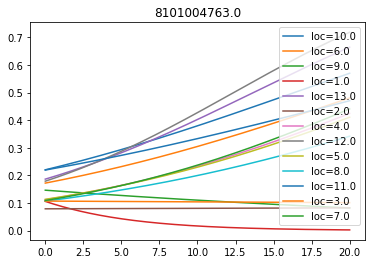

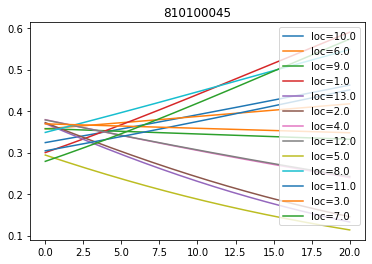

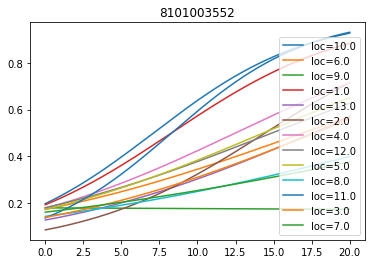

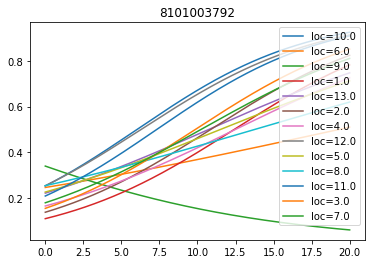

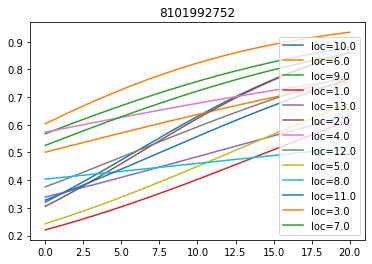

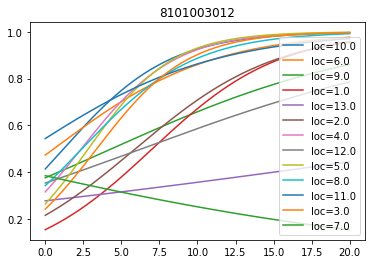

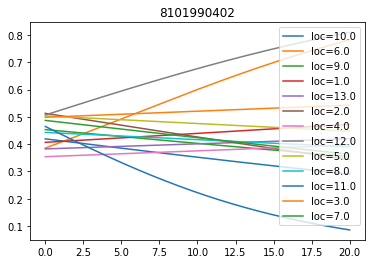

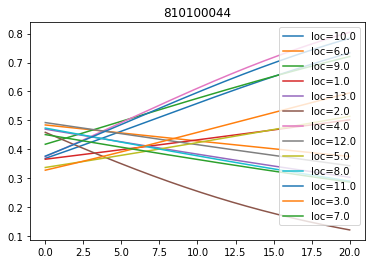

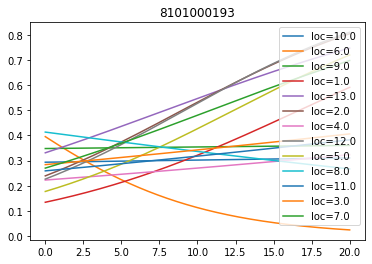

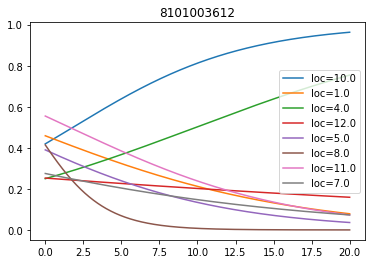

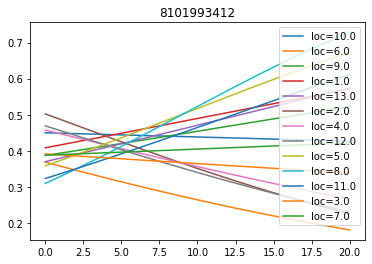

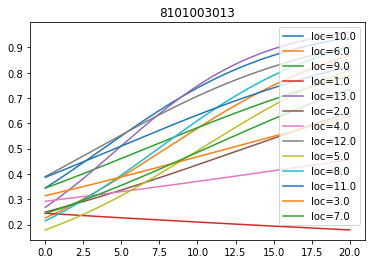

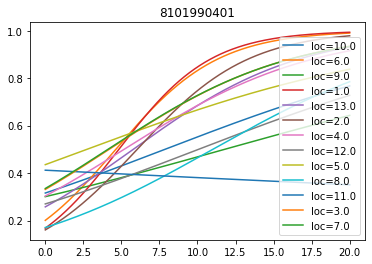

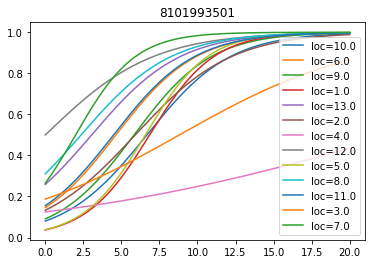

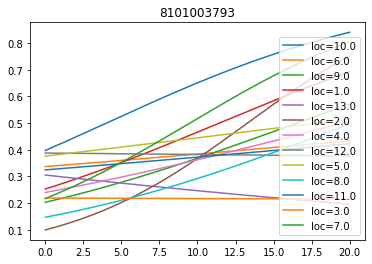

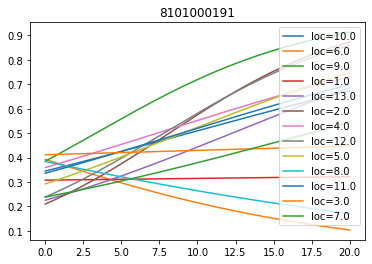

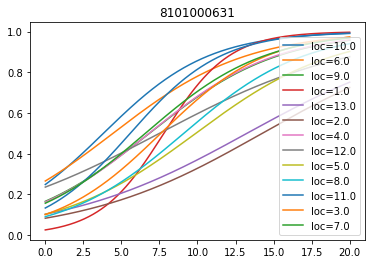

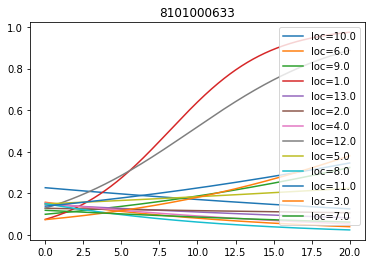

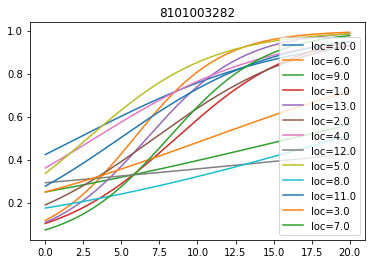

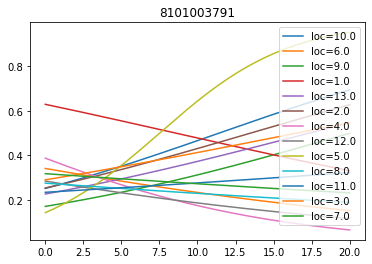

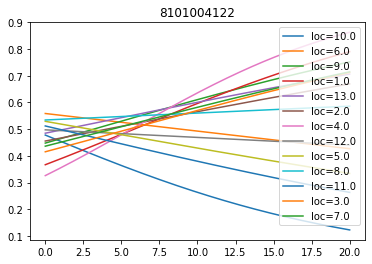

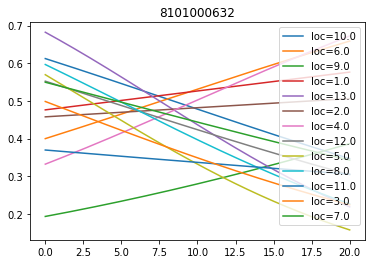

In [39]:
ids = df4['sbj'].unique()
perlocPSE = {}
for id in ids:
    locations = df4['pos'].unique()
    temp  = {}
    for loc in locations:
        x = df4[(df4['sbj']==id) & (df4['pos'] == loc)][['stm']].to_numpy()
        y = np.array(df4[(df4['sbj']==id)&(df4['pos'] == loc)]['ans']).astype(float)
        for i in range(len(x)):
            x[i][0] = int(x[i][0].replace("Supplementary Material/","").split(".")[0])/10
        if len(x) <1 or len(np.unique(y))<2:
            continue
        model = LogisticRegression(solver='liblinear', random_state=0)
        model.fit(x, y)
        pred_input = np.linspace(0,20,1000).reshape(-1, 1)
        predictions = model.predict_proba(pred_input)
        index = 1#np.argmax(predictions[-1])
        plt.plot(pred_input,predictions[:,index], label = "loc="+str(loc))
        temp[loc] = pred_input[list(predictions[:,index].flatten()).index(min(list(predictions[:,index].flatten()), key=lambda x:abs(x-0.5)))]
    perlocPSE[id] = temp
    plt.title(id)
    plt.legend()
    plt.show()

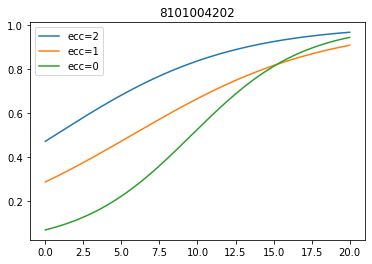

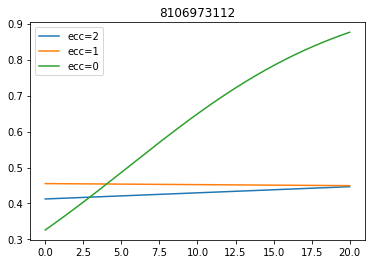

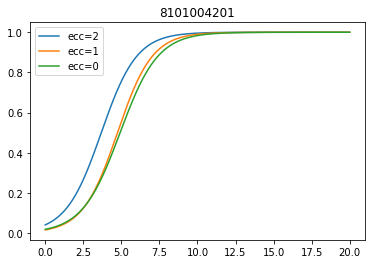

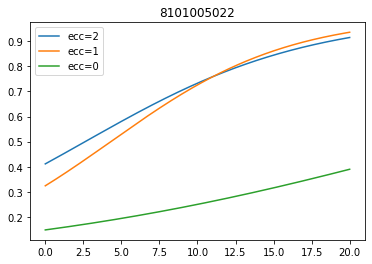

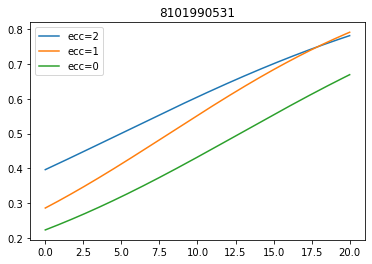

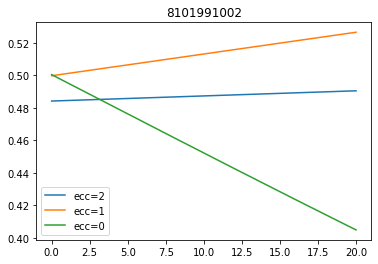

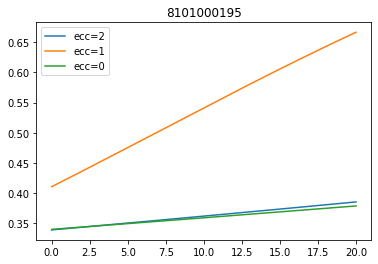

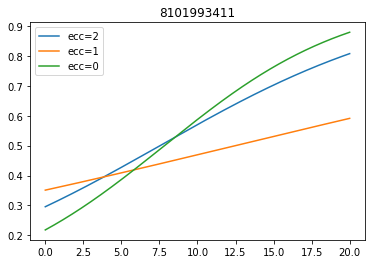

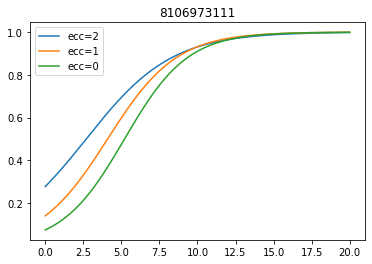

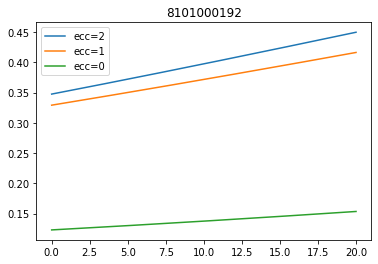

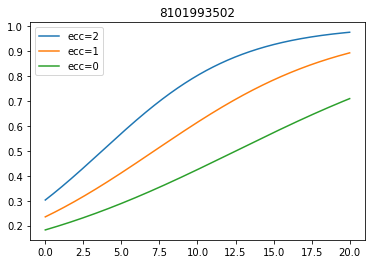

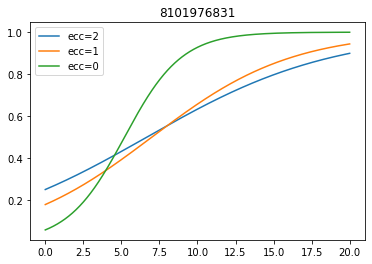

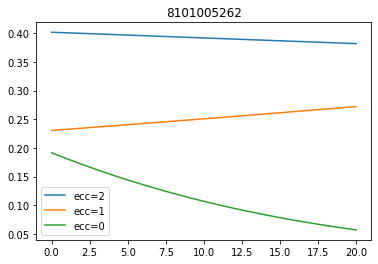

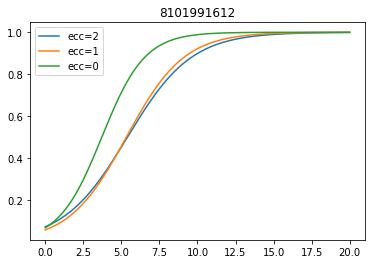

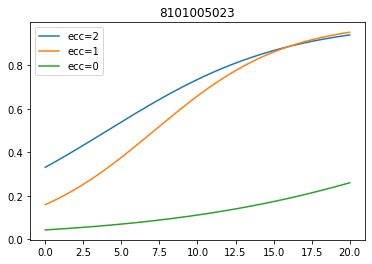

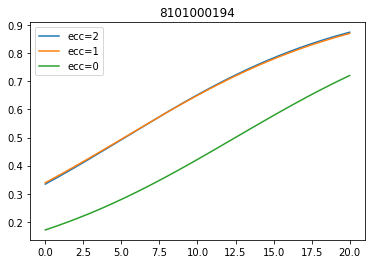

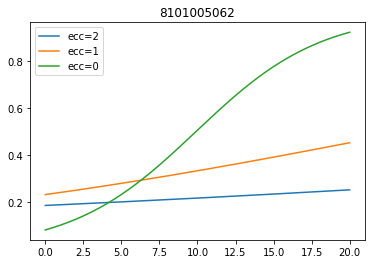

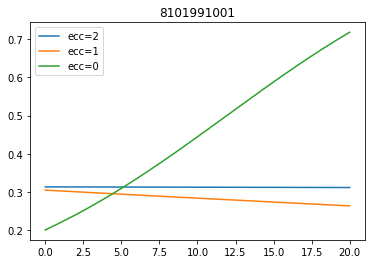

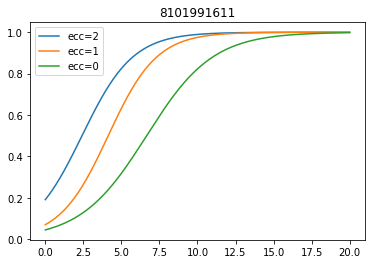

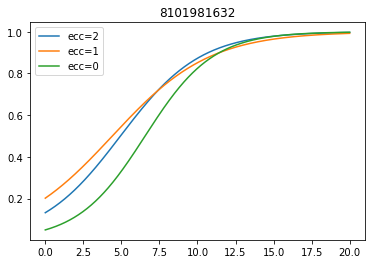

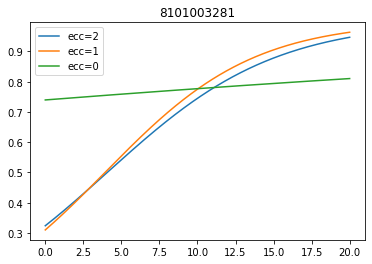

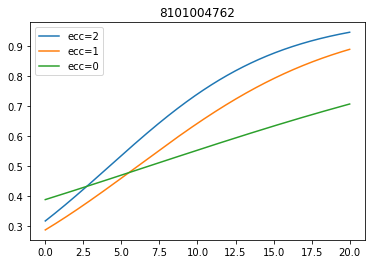

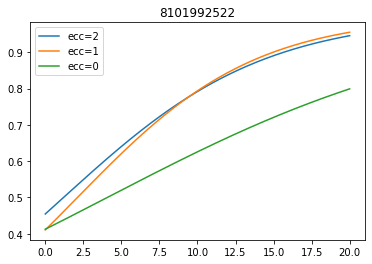

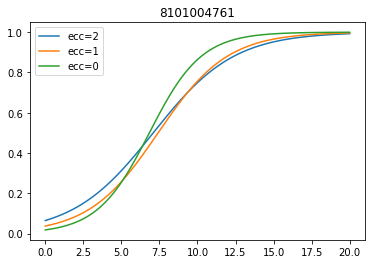

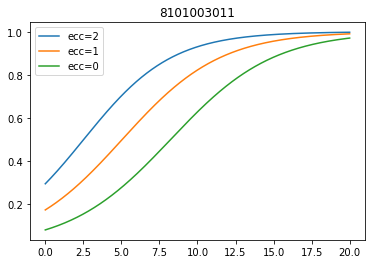

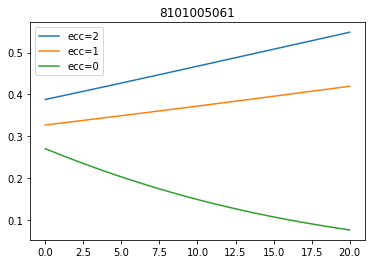

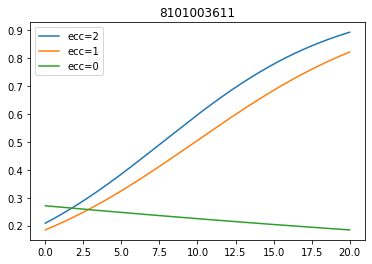

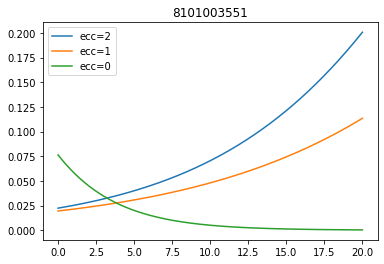

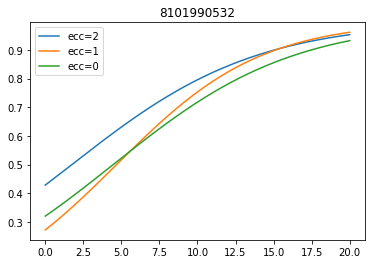

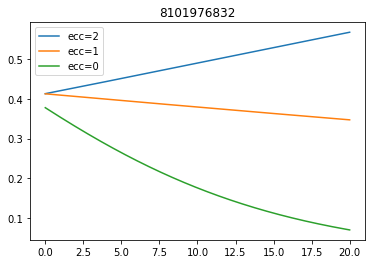

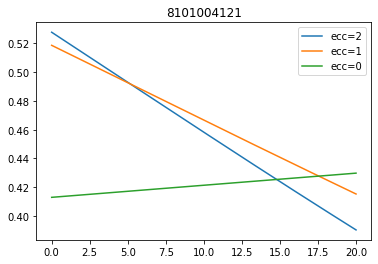

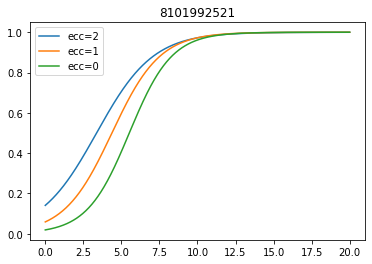

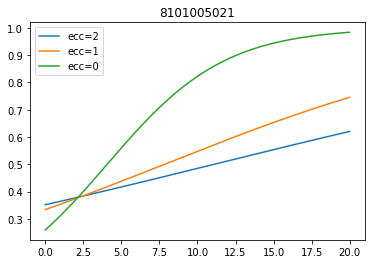

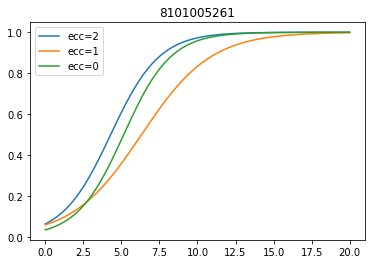

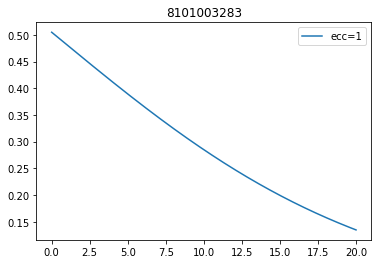

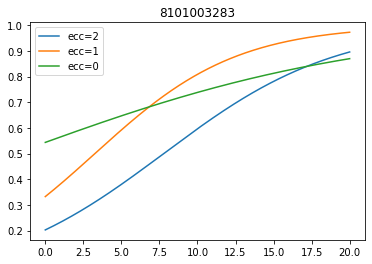

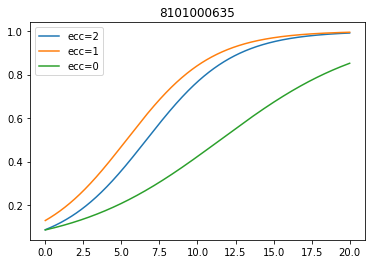

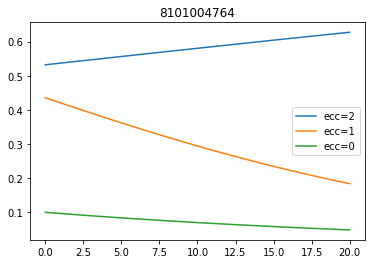

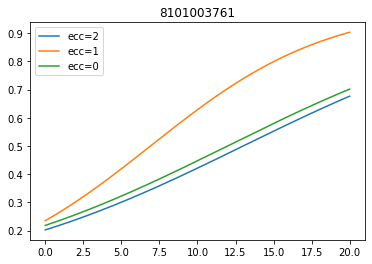

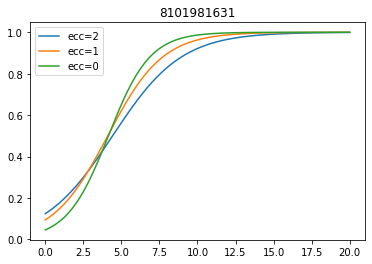

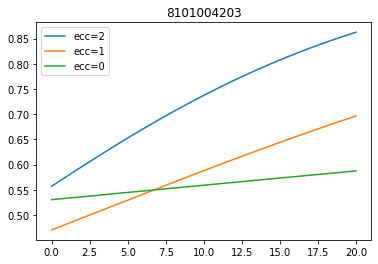

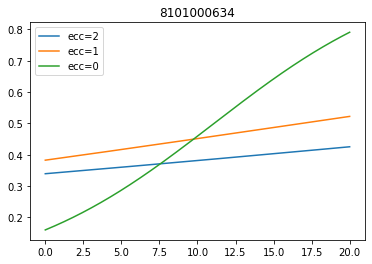

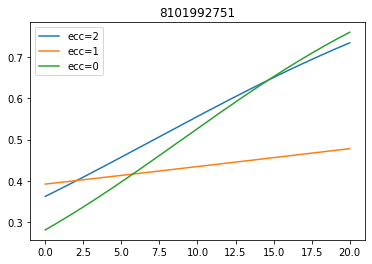

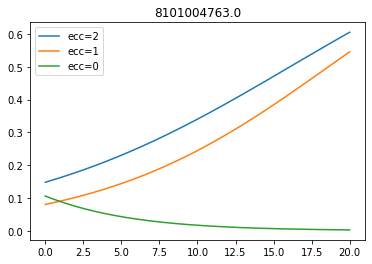

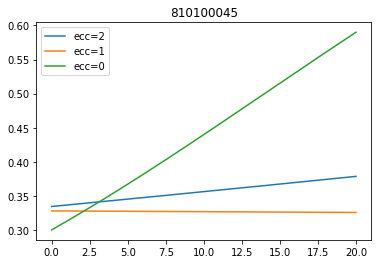

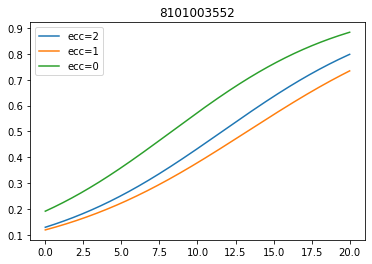

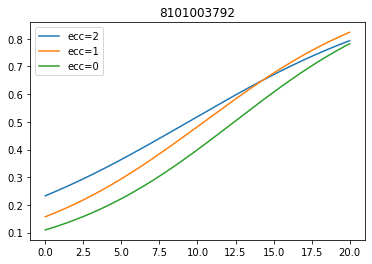

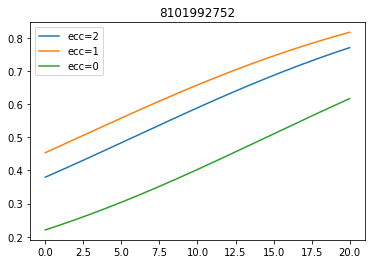

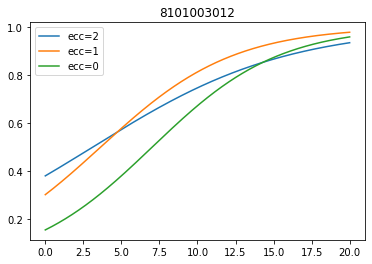

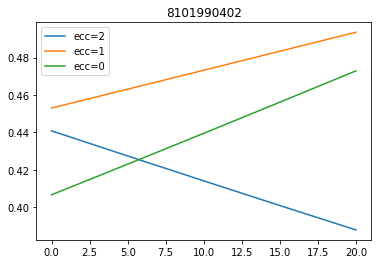

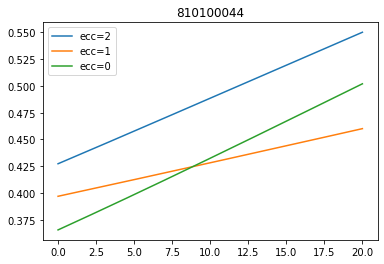

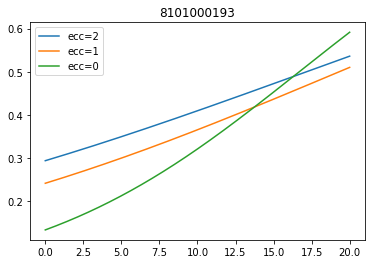

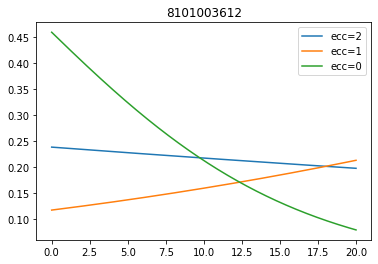

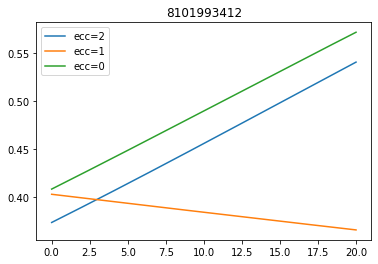

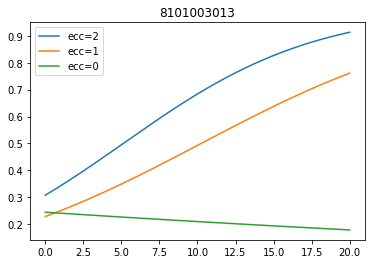

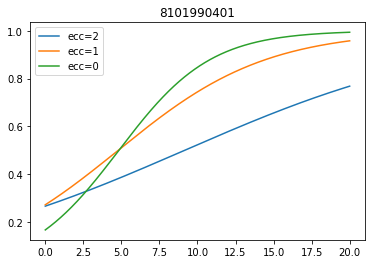

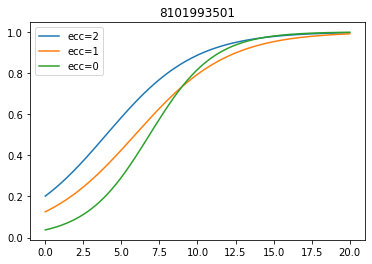

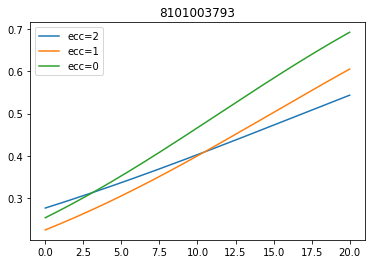

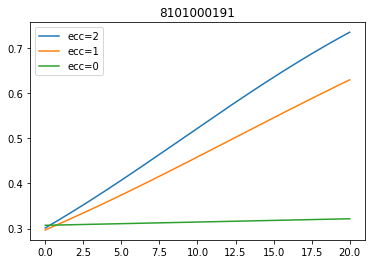

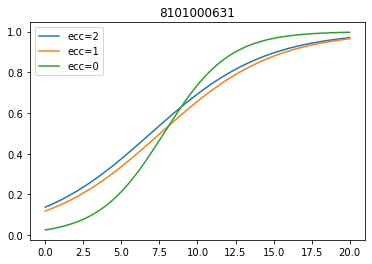

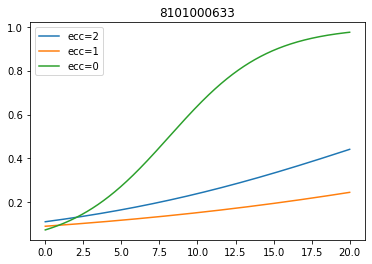

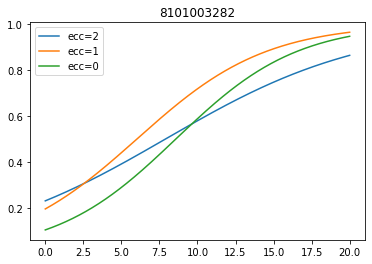

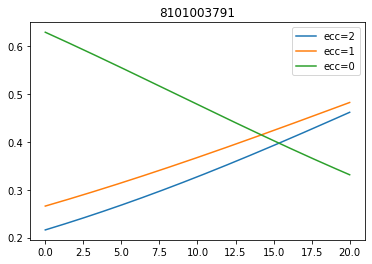

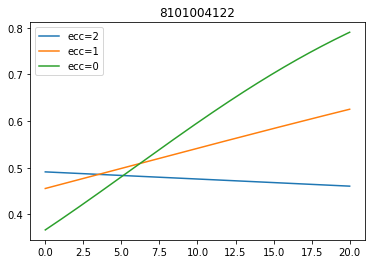

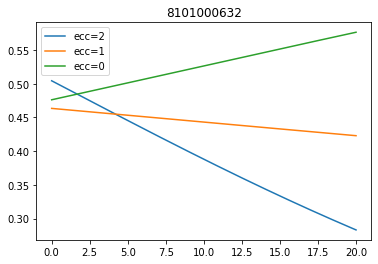

In [40]:
ids = df4['sbj'].unique()
pereccPSE = {}
for id in ids:
    eccs = df4['ecc'].unique()
    temp = {}
    for ecc in eccs:
        x = df4[(df4['sbj']==id) & (df4['ecc'] == ecc)][['stm']].to_numpy()
        y = np.array(df4[(df4['sbj']==id)&(df4['ecc'] == ecc)]['ans']).astype(float)
        for i in range(len(x)):
            x[i][0] = int(x[i][0].replace("Supplementary Material/","").split(".")[0])/10
        if len(x) <1 or len(np.unique(y))<2:
            continue
        model = LogisticRegression(solver='liblinear', random_state=0)
        model.fit(x, y)
        pred_input = np.linspace(0,20,1000).reshape(-1, 1)
        predictions = model.predict_proba(pred_input)
        plt.plot(pred_input,predictions[:,1], label = "ecc="+str(ecc))
        temp[ecc] = pred_input[list(predictions[:,index].flatten()).index(min(list(predictions[:,index].flatten()), key=lambda x:abs(x-0.5)))]
    pereccPSE[id] = temp
    plt.title(id)
    plt.legend()
    plt.show()

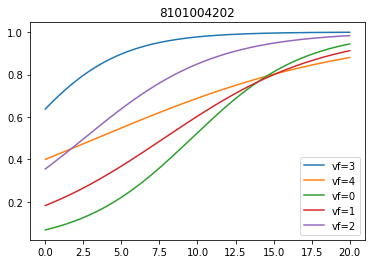

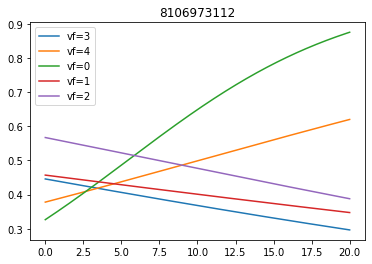

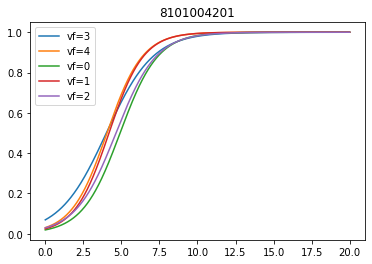

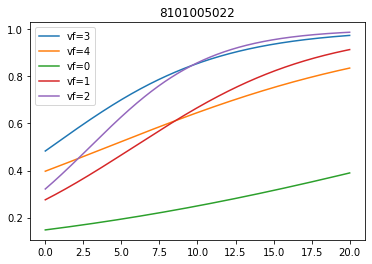

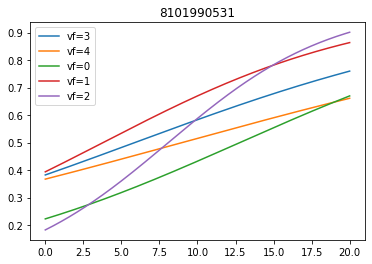

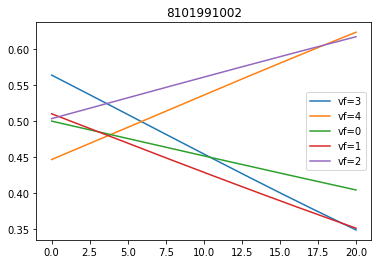

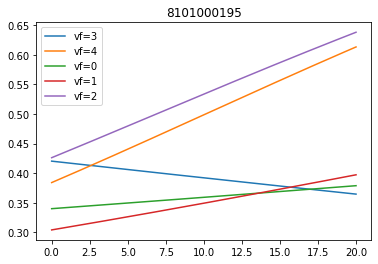

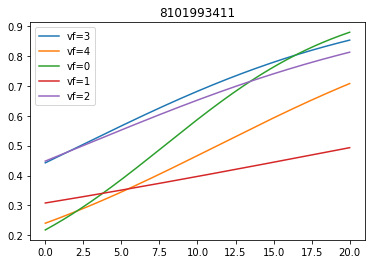

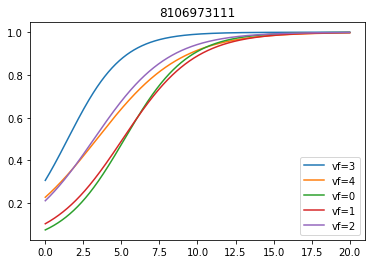

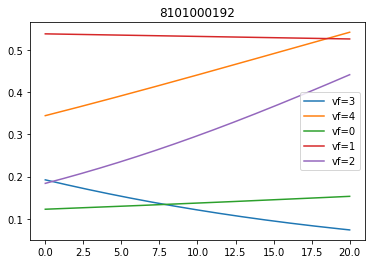

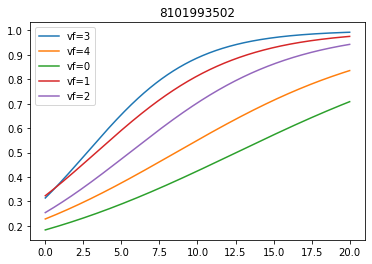

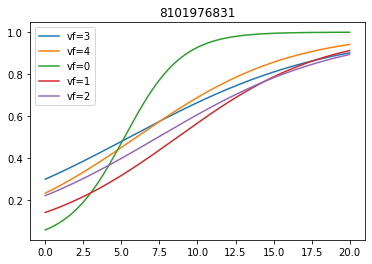

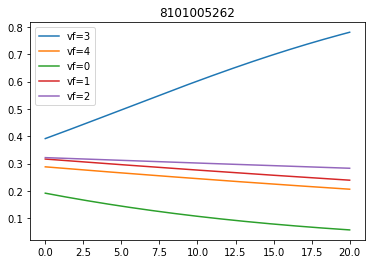

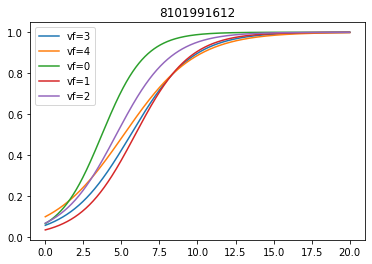

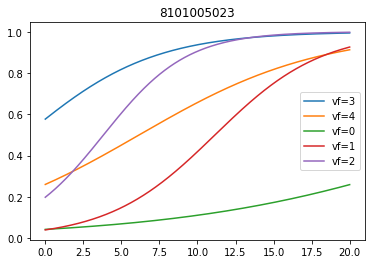

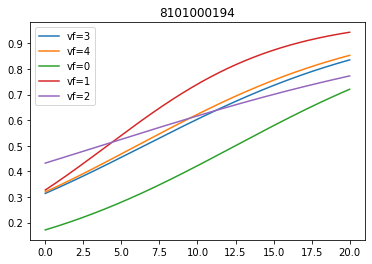

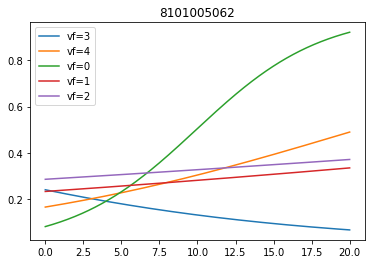

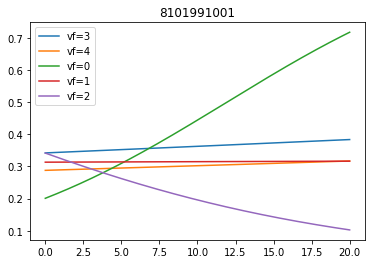

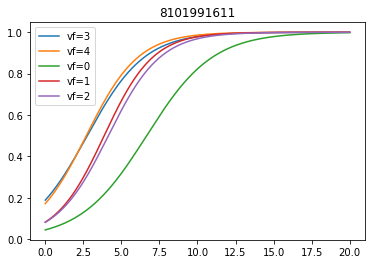

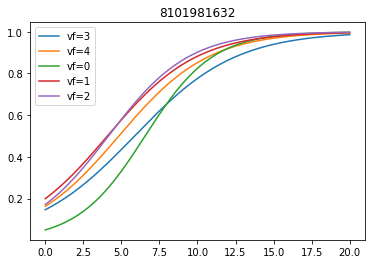

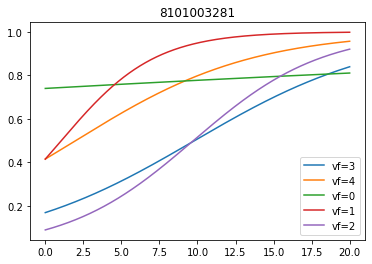

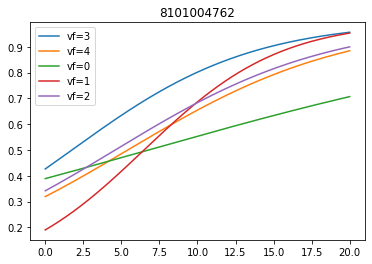

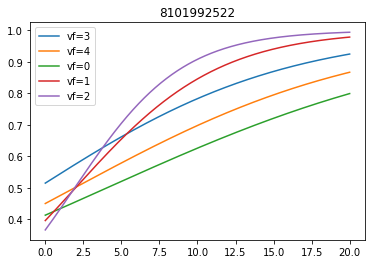

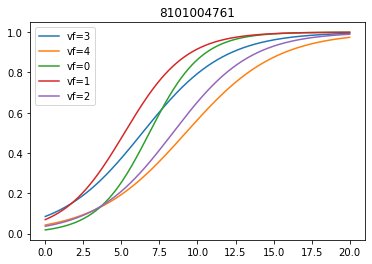

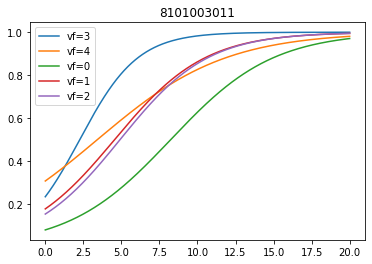

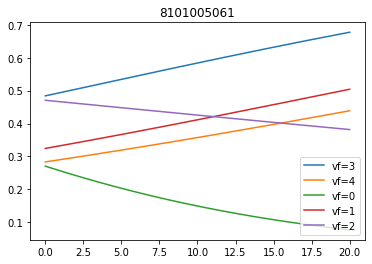

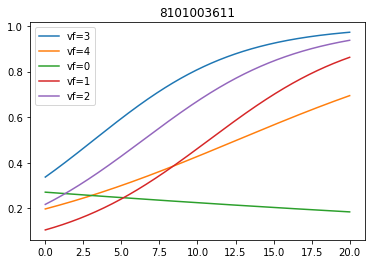

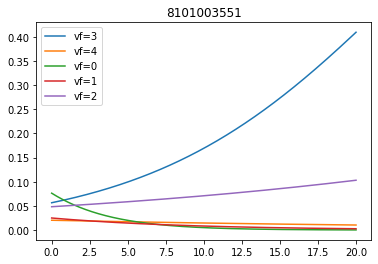

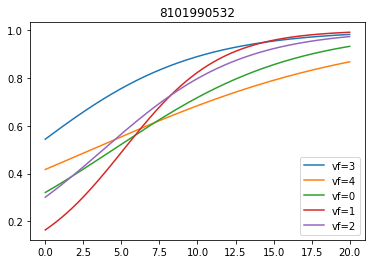

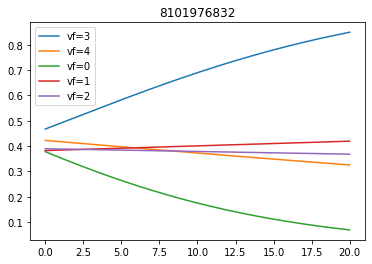

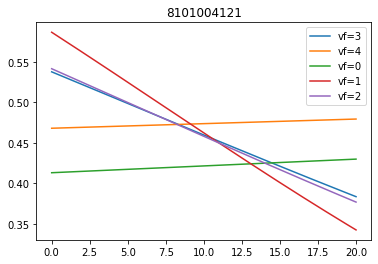

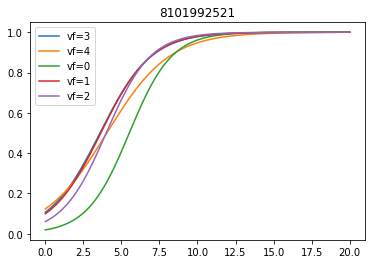

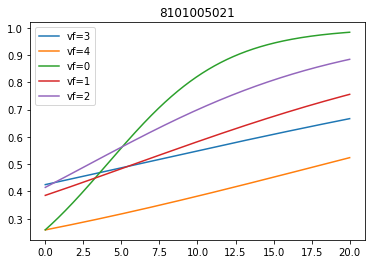

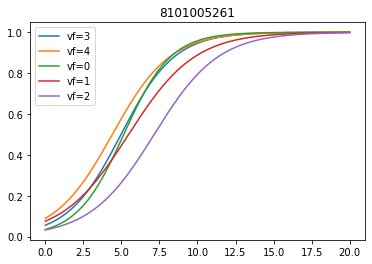

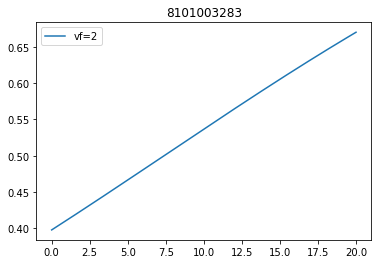

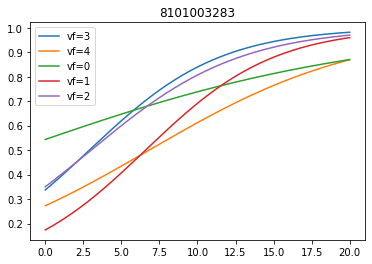

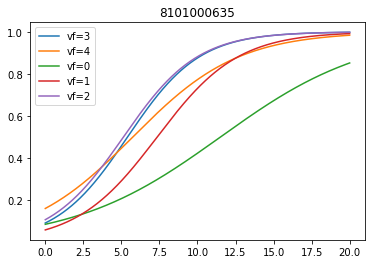

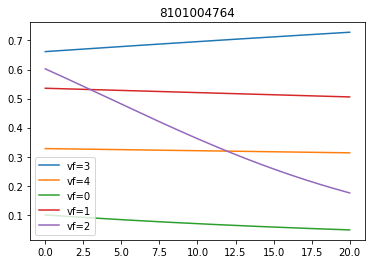

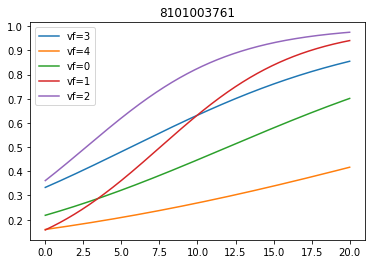

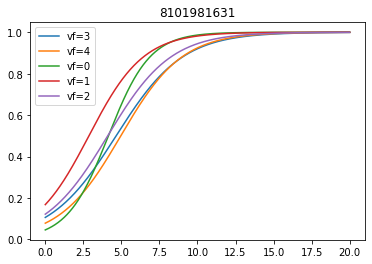

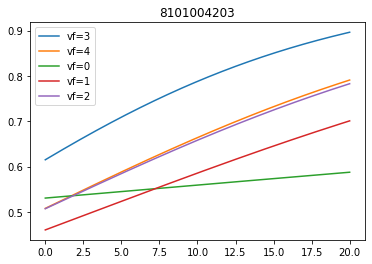

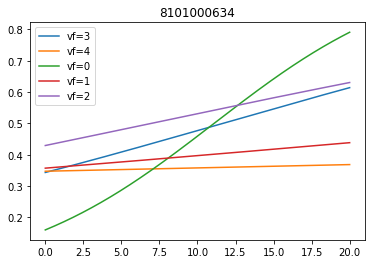

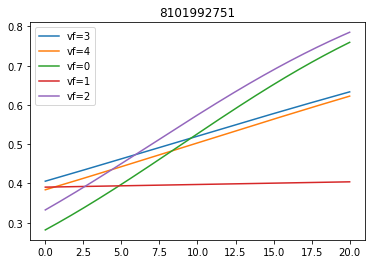

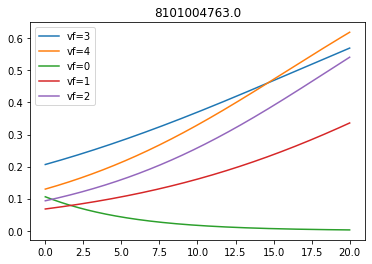

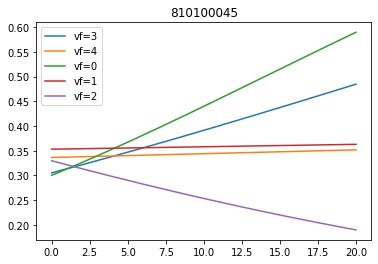

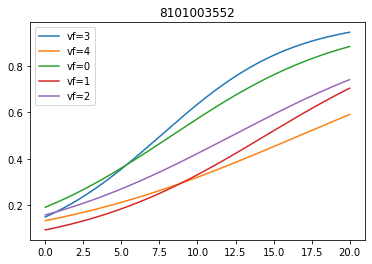

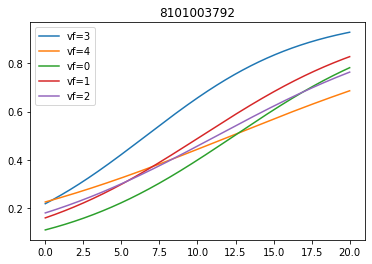

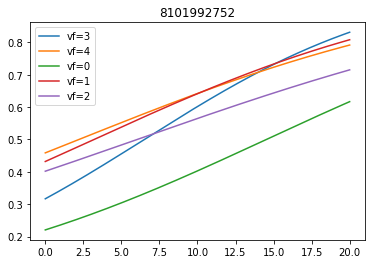

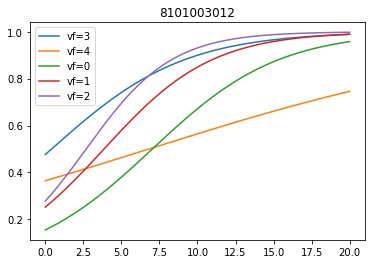

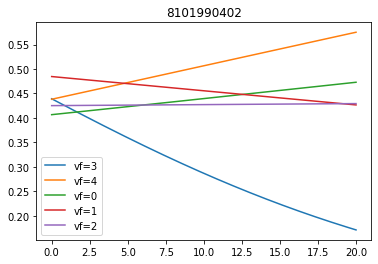

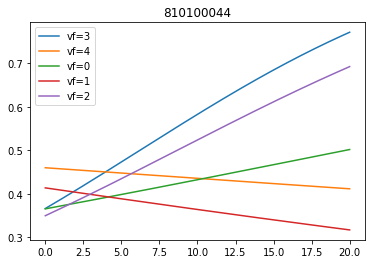

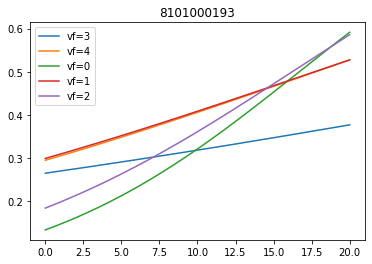

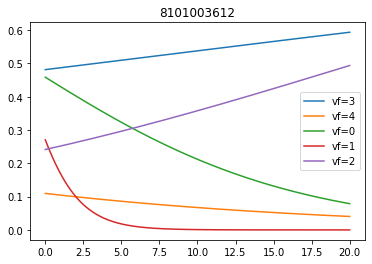

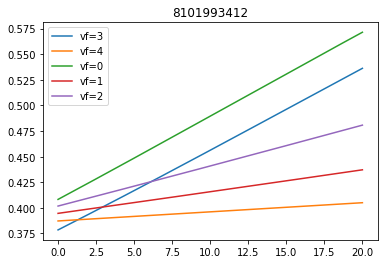

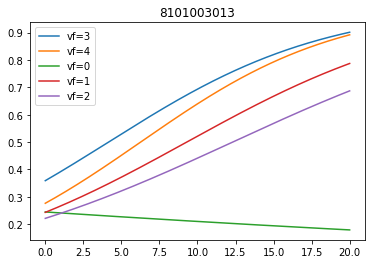

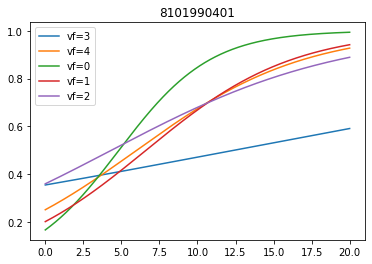

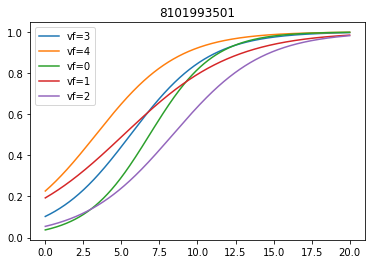

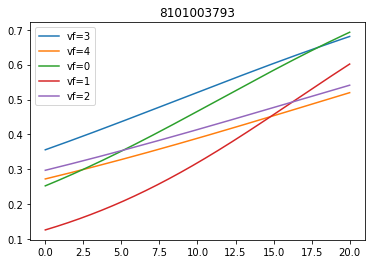

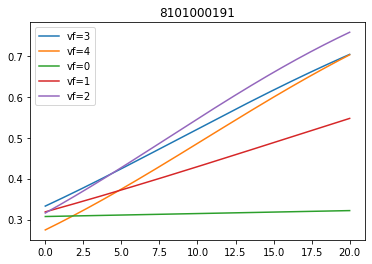

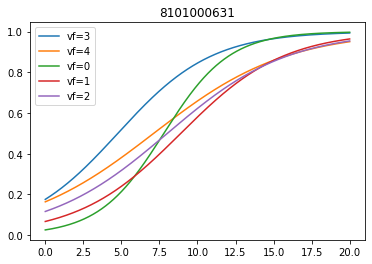

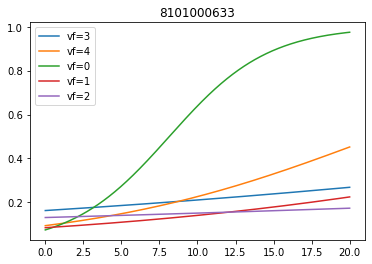

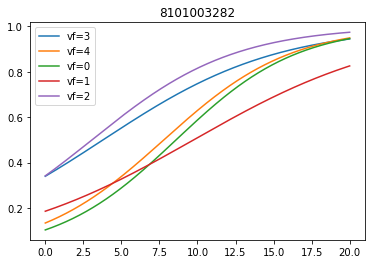

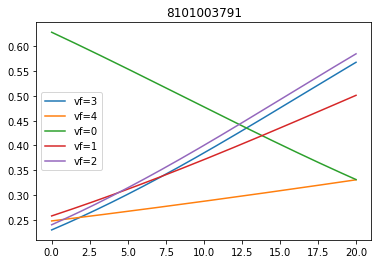

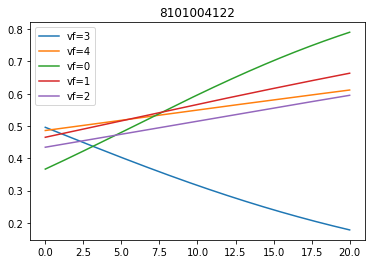

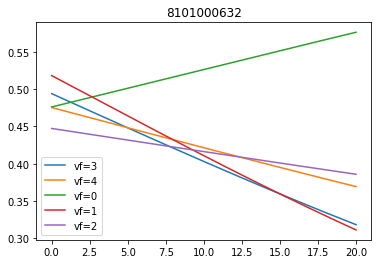

In [41]:
ids = df4['sbj'].unique()
pervfPSE = {}
for id in ids:
    vfs = df4['vf'].unique()
    temp = {}
    for vf in vfs:
        x = df4[(df4['sbj']==id) & (df4['vf'] == vf)][['stm']].to_numpy()
        y = np.array(df4[(df4['sbj']==id)&(df4['vf'] == vf)]['ans']).astype(float)
        for i in range(len(x)):
            x[i][0] = int(x[i][0].replace("Supplementary Material/","").split(".")[0])/10
        if len(x) <1 or len(np.unique(y))<2:
            continue
        model = LogisticRegression(solver='liblinear', random_state=0)
        model.fit(x, y)
        pred_input = np.linspace(0,20,1000).reshape(-1, 1)
        predictions = model.predict_proba(pred_input)
        plt.plot(pred_input,predictions[:,1], label = "vf="+str(vf))
        temp[vf] = pred_input[list(predictions[:,index].flatten()).index(min(list(predictions[:,index].flatten()), key=lambda x:abs(x-0.5)))]
    pervfPSE[id] = temp
    plt.title(id)
    plt.legend()
    plt.show()

calculate PSE per sbj for required parameters

In [42]:
locs = df4['loc'].unique()
dfnew = pd.DataFrame(df4['sbj'].unique())
dfnew.columns = ['sbj']
for loc in locs:
    temp = []
    for k in perlocPSE.keys():
      if float(loc) in perlocPSE[k].keys():
        temp.append([k,perlocPSE[k][float(loc)][0]])
      else:
        temp.append([k,-1])
    temp = pd.DataFrame(temp)
    temp.columns = ['sbj', 'PSEinloc'+str(loc)]
    dfnew = pd.merge(dfnew, temp, on='sbj')
locs = df4['ecc'].unique()
for loc in locs:
    temp = []
    for k in perlocPSE.keys():
      if float(loc) in pereccPSE[k].keys():
        temp.append([k,pereccPSE[k][float(loc)][0]])
      else:
        temp.append([k,-1])
    temp = pd.DataFrame(temp)
    temp.columns = ['sbj', 'PSEinecc'+str(loc)]
    dfnew = pd.merge(dfnew, temp, on='sbj')
locs = df4['vf'].unique()
for loc in locs:
    temp = []
    for k in perlocPSE.keys():
      if float(loc) in pervfPSE[k].keys():
        temp.append([k,pervfPSE[k][float(loc)][0]])
      else:
        temp.append([k,-1])
    temp = pd.DataFrame(temp)
    temp.columns = ['sbj', 'PSEinvf'+str(loc)]
    dfnew = pd.merge(dfnew, temp, on='sbj')
dfnew

sbj  PSEinloc10  PSEinloc6  PSEinloc9  PSEinloc1  PSEinloc13  \
0   8101004202    0.000000   1.781782   2.502503   9.609610    5.745746   
1   8106973112    1.561562   0.000000   4.044044   5.405405    0.000000   
2   8101004201    2.582583   5.165165   3.563564   4.924925    3.163163   
3   8101005022    0.000000   4.684685   3.683684  20.000000    6.646647   
4   8101990531    1.101101   0.000000   0.140140  12.792793   11.451451   
..         ...         ...        ...        ...        ...         ...   
60  8101000633    0.000000   0.000000  20.000000   8.148148    0.000000   
61  8101003282    2.122122   5.825826  16.256256   8.588589    6.686687   
62  8101003791   11.431431   0.000000  20.000000   8.548549   17.357357   
63  8101004122    0.000000   8.888889   3.183183   5.825826    1.301301   
64  8101000632    8.388388   7.647648  20.000000   4.744745    7.487487   

    PSEinloc2  PSEinloc4  PSEinloc12  PSEinloc5  ...  PSEinloc3  PSEinloc7  \
0   12.372372   5.045045    0.000000   0.000000  ...   8.288288  15.995996   
1   20.000000  -1.000000   11.991992   7.447447  ...   0.000000   5.705706   
2    4.624625   3.963964    3.483483   5.065065  ...   4.444444   4.284284   
3    8.268268   3.623624    0.000000   1.881882  ...   3.303303   3.943944   
4    4.624625   7.327327   12.192192   9.549550  ...   8.668669   4.164164   
..        ...        ...         ...        ...  ...        ...        ...   
60   0.000000   0.000000    9.589590  20.000000  ...  20.000000   0.000000   
61   7.167167   3.263263   20.000000   2.802803  ...  10.770771   8.088088   
62  13.513514   0.000000    0.000000   7.507508  ...  16.536537   0.000000   
63   4.024024   5.665666    0.000000   2.902903  ...   5.485485   4.364364   
64  17.537538   9.869870    4.044044   2.862863  ...   0.000000   4.664665   

    PSEinecc2  PSEinecc1  PSEinecc0   PSEinvf3   PSEinvf4   PSEinvf0  \
0    0.660661   5.705706   9.609610   0.000000   3.383383   9.609610   
1   20.000000   0.000000   5.405405   0.000000  10.070070   5.405405   
2    3.683684   4.744745   4.924925   4.004004   4.044044   4.924925   
3    2.622623   4.304304  20.000000   0.380380   4.104104  20.000000   
4    4.964965   8.148148  12.792793   5.885886   8.988989  12.792793   
..        ...        ...        ...        ...        ...        ...   
60  20.000000  20.000000   8.148148  20.000000  20.000000   8.148148   
61   7.927928   6.026026   8.588589   3.803804   7.787788   8.588589   
62  20.000000  20.000000   8.548549  16.316316  20.000000   8.548549   
63   0.000000   5.165165   5.825826   0.000000   2.162162   5.825826   
64   0.360360   0.000000   4.744745   0.000000   0.000000   4.744745   

     PSEinvf1   PSEinvf2  
0    7.807808   2.562563  
1    0.000000   7.447447  
2    4.184184   4.644645  
3    5.825826   2.942943  
4    3.803804   8.088088  
..        ...        ...  
60  20.000000  20.000000  
61   9.749750   3.063063  
62  19.919920  15.415415  
63   3.403403   8.128128  
64   1.681682   0.000000  

[65 rows x 22 columns]

In [149]:
locs = df4['loc'].unique()
dflocs = pd.DataFrame(df4['sbj'].unique())
dflocs.columns = ['sbj']
for loc in locs:
    temp = []
    for k in perlocPSE.keys():
      if float(loc) in perlocPSE[k].keys():
        temp.append([k,perlocPSE[k][float(loc)][0]])
      else:
        temp.append([k,-1])
    temp = pd.DataFrame(temp)
    temp.columns = ['sbj', 'PSEinloc'+str(loc)]
    dflocs = pd.merge(dflocs, temp, on='sbj')
dflocs

sbj  PSEinloc10  PSEinloc6  PSEinloc9  PSEinloc1  PSEinloc13  \
0   8101004202    0.000000   1.781782   2.502503   9.609610    5.745746   
1   8106973112    1.561562   0.000000   4.044044   5.405405    0.000000   
2   8101004201    2.582583   5.165165   3.563564   4.924925    3.163163   
3   8101005022    0.000000   4.684685   3.683684  20.000000    6.646647   
4   8101990531    1.101101   0.000000   0.140140  12.792793   11.451451   
..         ...         ...        ...        ...        ...         ...   
60  8101000633    0.000000   0.000000  20.000000   8.148148    0.000000   
61  8101003282    2.122122   5.825826  16.256256   8.588589    6.686687   
62  8101003791   11.431431   0.000000  20.000000   8.548549   17.357357   
63  8101004122    0.000000   8.888889   3.183183   5.825826    1.301301   
64  8101000632    8.388388   7.647648  20.000000   4.744745    7.487487   

    PSEinloc2  PSEinloc4  PSEinloc12  PSEinloc5  PSEinloc8  PSEinloc11  \
0   12.372372   5.045045    0.000000   0.000000   5.185185    0.000000   
1   20.000000  -1.000000   11.991992   7.447447   0.000000   11.131131   
2    4.624625   3.963964    3.483483   5.065065   3.103103    5.265265   
3    8.268268   3.623624    0.000000   1.881882   4.924925    2.302302   
4    4.624625   7.327327   12.192192   9.549550   0.000000   20.000000   
..        ...        ...         ...        ...        ...         ...   
60   0.000000   0.000000    9.589590  20.000000   0.000000   20.000000   
61   7.167167   3.263263   20.000000   2.802803  19.299299    4.924925   
62  13.513514   0.000000    0.000000   7.507508   0.000000   20.000000   
63   4.024024   5.665666    0.000000   2.902903   0.000000    0.880881   
64  17.537538   9.869870    4.044044   2.862863   4.824825    0.000000   

    PSEinloc3  PSEinloc7  
0    8.288288  15.995996  
1    0.000000   5.705706  
2    4.444444   4.284284  
3    3.303303   3.943944  
4    8.668669   4.164164  
..        ...        ...  
60  20.000000   0.000000  
61  10.770771   8.088088  
62  16.536537   0.000000  
63   5.485485   4.364364  
64   0.000000   4.664665  

[65 rows x 14 columns]

In [44]:
locs = df4['ecc'].unique()
dfecc = pd.DataFrame(df4['sbj'].unique())
dfecc.columns = ['sbj']
for loc in locs:
    temp = []
    for k in perlocPSE.keys():
      if float(loc) in pereccPSE[k].keys():
        temp.append([k,pereccPSE[k][float(loc)][0]])
      else:
        temp.append([k,-1])
    temp = pd.DataFrame(temp)
    temp.columns = ['sbj', 'PSEinecc'+str(loc)]
    dfecc = pd.merge(dfecc, temp, on='sbj')
dfecc

sbj  PSEinecc2  PSEinecc1  PSEinecc0
0   8101004202   0.660661   5.705706   9.609610
1   8106973112  20.000000   0.000000   5.405405
2   8101004201   3.683684   4.744745   4.924925
3   8101005022   2.622623   4.304304  20.000000
4   8101990531   4.964965   8.148148  12.792793
..         ...        ...        ...        ...
60  8101000633  20.000000  20.000000   8.148148
61  8101003282   7.927928   6.026026   8.588589
62  8101003791  20.000000  20.000000   8.548549
63  8101004122   0.000000   5.165165   5.825826
64  8101000632   0.360360   0.000000   4.744745

[65 rows x 4 columns]

In [45]:
locs = df4['vf'].unique()
dfvf = pd.DataFrame(df4['sbj'].unique())
dfvf.columns = ['sbj']
for loc in locs:
    temp = []
    for k in perlocPSE.keys():
      if float(loc) in pervfPSE[k].keys():
        temp.append([k,pervfPSE[k][float(loc)][0]])
      else:
        temp.append([k,-1])
    temp = pd.DataFrame(temp)
    temp.columns = ['sbj', 'PSEinvf'+str(loc)]
    dfvf = pd.merge(dfvf, temp, on='sbj')
dfvf

sbj   PSEinvf3   PSEinvf4   PSEinvf0   PSEinvf1   PSEinvf2
0   8101004202   0.000000   3.383383   9.609610   7.807808   2.562563
1   8106973112   0.000000  10.070070   5.405405   0.000000   7.447447
2   8101004201   4.004004   4.044044   4.924925   4.184184   4.644645
3   8101005022   0.380380   4.104104  20.000000   5.825826   2.942943
4   8101990531   5.885886   8.988989  12.792793   3.803804   8.088088
..         ...        ...        ...        ...        ...        ...
60  8101000633  20.000000  20.000000   8.148148  20.000000  20.000000
61  8101003282   3.803804   7.787788   8.588589   9.749750   3.063063
62  8101003791  16.316316  20.000000   8.548549  19.919920  15.415415
63  8101004122   0.000000   2.162162   5.825826   3.403403   8.128128
64  8101000632   0.000000   0.000000   4.744745   1.681682   0.000000

[65 rows x 6 columns]

# RSA

In [150]:
array = []
print(df4['sbj'].unique())
for k in df4['sbj'].unique():
    array.append(np.array(dflocs[dflocs['sbj'] == k])[0][1:])
np.shape(array)

[8101004202 8106973112 8101004201 8101005022 8101990531 8101991002
 8101000195 8101993411 8106973111 8101000192 8101993502 8101976831
 8101005262 8101991612 8101005023 8101000194 8101005062 8101991001
 8101991611 8101981632 8101003281 8101004762 8101992522 8101004761
 8101003011 8101005061 8101003611 8101003551 8101990532 8101976832
 8101004121 8101992521 8101005021 8101005261 8101003283 '8101003283'
 '8101000635' '8101004764' '8101003761' '8101981631' '8101004203'
 '8101000634' '8101992751' '8101004763.0' '810100045' '8101003552'
 '8101003792' '8101992752' '8101003012' '8101990402' '810100044'
 '8101000193' '8101003612' '8101993412' '8101003013' '8101990401'
 '8101993501' '8101003793' '8101000191' '8101000631' '8101000633'
 '8101003282' '8101003791' '8101004122' '8101000632']


(65, 13)

In [151]:
dist = np.zeros((65,65))
for i in range(len(array)):
    for j in range(len(array)):
        dist[i][j] = np.linalg.norm(np.array(array[i])-np.array(array[j]))

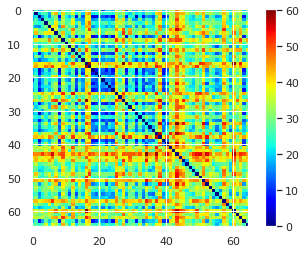

In [152]:
plt.imshow(
    dist, 
    cmap='jet', 
)
plt.colorbar()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


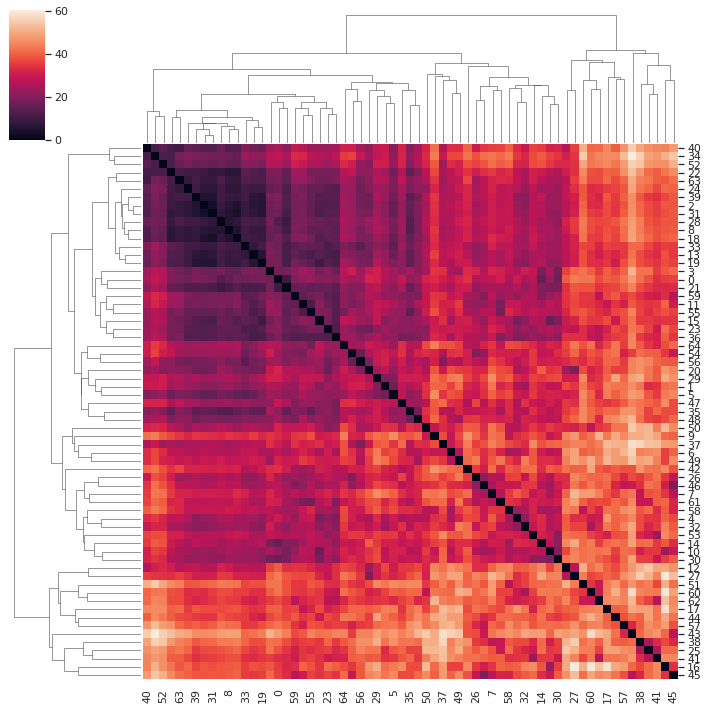

In [72]:
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.clustermap(dist,yticklabels = 1)

In [154]:
cluster1 = [40,34,52]
cluster2 = [22,63,24,39,2,31,28,8,18,33,13,19]
cluster3 = [3,0,21,59,11,55,15,23,36]
cluster4 = [64,54,56,20,29,1,5,47,35,48,50,9,37,6,49,42,26,46,7,61,58,4,32,53,14,10,30]
cluster5 = [12,27,51,60,62,17,44,57,43,38,25,41,16,45]

In [155]:
sbjs = df4['sbj'].unique()
clusters = []
for i in range(len(sbjs)):
    tmp = [sbjs[i]]
    if i in cluster1:
        tmp.append('1')
    elif i in cluster2:
        tmp.append('2')
    elif i in cluster3:
        tmp.append('3')
    elif i in cluster4:
        tmp.append('4')
    else:
        tmp.append('5')
    clusters.append(tmp)
clusters

[[8101004202, '3'],
 [8106973112, '4'],
 [8101004201, '2'],
 [8101005022, '3'],
 [8101990531, '4'],
 [8101991002, '4'],
 [8101000195, '4'],
 [8101993411, '4'],
 [8106973111, '2'],
 [8101000192, '4'],
 [8101993502, '4'],
 [8101976831, '3'],
 [8101005262, '5'],
 [8101991612, '2'],
 [8101005023, '4'],
 [8101000194, '3'],
 [8101005062, '5'],
 [8101991001, '5'],
 [8101991611, '2'],
 [8101981632, '2'],
 [8101003281, '4'],
 [8101004762, '3'],
 [8101992522, '2'],
 [8101004761, '3'],
 [8101003011, '2'],
 [8101005061, '5'],
 [8101003611, '4'],
 [8101003551, '5'],
 [8101990532, '2'],
 [8101976832, '4'],
 [8101004121, '4'],
 [8101992521, '2'],
 [8101005021, '4'],
 [8101005261, '2'],
 [8101003283, '1'],
 ['8101003283', '4'],
 ['8101000635', '3'],
 ['8101004764', '4'],
 ['8101003761', '5'],
 ['8101981631', '2'],
 ['8101004203', '1'],
 ['8101000634', '5'],
 ['8101992751', '4'],
 ['8101004763.0', '5'],
 ['810100045', '5'],
 ['8101003552', '5'],
 ['8101003792', '4'],
 ['8101992752', '4'],
 ['8101003012

In [156]:
pd.DataFrame(clusters, columns=['sbj', 'cluster']) 

sbj cluster
0   8101004202       3
1   8106973112       4
2   8101004201       2
3   8101005022       3
4   8101990531       4
..         ...     ...
60  8101000633       5
61  8101003282       4
62  8101003791       5
63  8101004122       2
64  8101000632       4

[65 rows x 2 columns]

In [158]:
dfclusters = pd.merge(df3, pd.DataFrame(clusters, columns=['sbj', 'cluster']) , on='sbj')
dfclusters.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... eyer eyel  vf2,loc5  sexm,loc11  sexm,loc9  sexm,uhndr  hndnsr,uhndr  \
0  ...    1    0         0           0          0           1             1   
1  ...    1    0         0           0          0           1             1   
2  ...    1    0         0           0          1           1             1   

   hndnsr,eyer  sexm,eyer  cluster  
0            1          1        3  
1            1          1        3  
2            1          1        3  

[3 rows x 49 columns]

In [159]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

Feature: 0, Score: 0.04427
Feature: 1, Score: 0.00033
Feature: 2, Score: 0.00016
Feature: 3, Score: 0.67946
Feature: 4, Score: 0.27443
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00011
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.00008
Feature: 9, Score: 0.00012
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00006
Feature: 14, Score: 0.00004
Feature: 15, Score: 0.00031
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00009
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00011
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00000


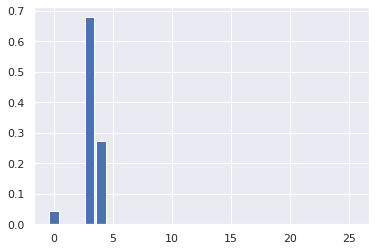

In [160]:
params = ['sexm','dhand','uhndr','hndnsr','eyer','loc1','loc2','loc3','loc4','loc5','loc6','loc7','loc8','loc9','loc10','loc11','loc12','loc13','ecc0','ecc1','ecc2','vf0','vf1','vf2','vf3','vf4']
model = DecisionTreeRegressor()
# fit the model
model.fit(dfclusters[params], np.array(dfclusters['cluster']))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### RSA

In [161]:
array = []
print(df4['sbj'].unique())
for k in df4['sbj'].unique():
    array.append(np.array(dfecc[dfecc['sbj'] == k])[0][1:])
np.shape(array)

[8101004202 8106973112 8101004201 8101005022 8101990531 8101991002
 8101000195 8101993411 8106973111 8101000192 8101993502 8101976831
 8101005262 8101991612 8101005023 8101000194 8101005062 8101991001
 8101991611 8101981632 8101003281 8101004762 8101992522 8101004761
 8101003011 8101005061 8101003611 8101003551 8101990532 8101976832
 8101004121 8101992521 8101005021 8101005261 8101003283 '8101003283'
 '8101000635' '8101004764' '8101003761' '8101981631' '8101004203'
 '8101000634' '8101992751' '8101004763.0' '810100045' '8101003552'
 '8101003792' '8101992752' '8101003012' '8101990402' '810100044'
 '8101000193' '8101003612' '8101993412' '8101003013' '8101990401'
 '8101993501' '8101003793' '8101000191' '8101000631' '8101000633'
 '8101003282' '8101003791' '8101004122' '8101000632']


(65, 3)

In [162]:
dist = np.zeros((65,65))
for i in range(len(array)):
    for j in range(len(array)):
        dist[i][j] = np.linalg.norm(np.array(array[i])-np.array(array[j]))

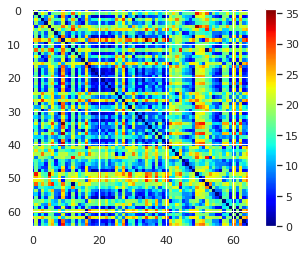

In [163]:
plt.imshow(
    dist, 
    cmap='jet', 
)
plt.colorbar()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


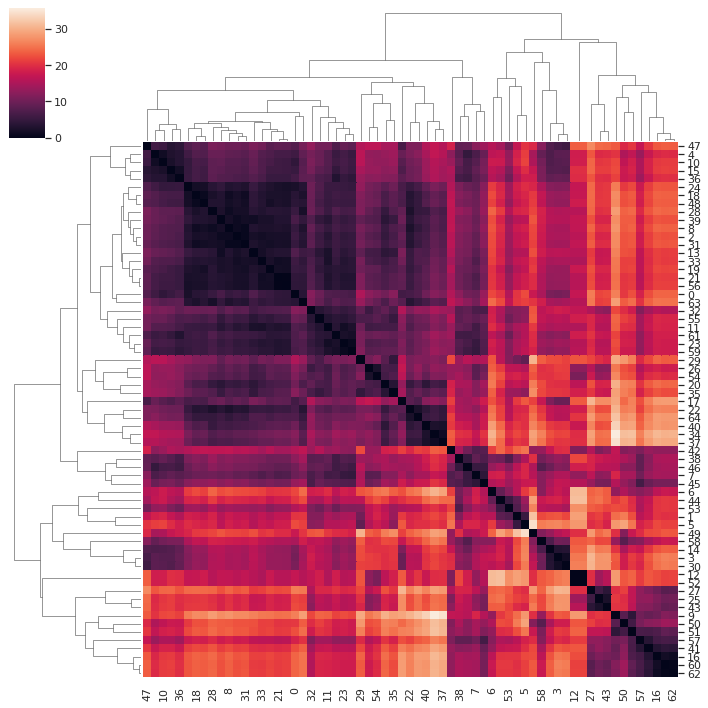

In [112]:
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.clustermap(dist,yticklabels = 1)

In [164]:
cluster1 = [47,4,10,15,36,24,18,48,28,39,8,2,31,13,33,19,21,56,0,63,32,55,11,61,23,59]
cluster2 = [29,26,54,20,35,17,22,64,40,34,37]
cluster3 = [42,38,46,7,45]
cluster4 = [6,44,53,1,5,49,58,14,3,30]
cluster5 = [12,52,27,25,43,9,50,51,57,41,16,60,62]

In [165]:
sbjs = df4['sbj'].unique()
clusters = []
for i in range(len(sbjs)):
    tmp = [sbjs[i]]
    if i in cluster1:
        tmp.append('1')
    elif i in cluster2:
        tmp.append('2')
    elif i in cluster3:
        tmp.append('3')
    elif i in cluster4:
        tmp.append('4')
    else:
        tmp.append('5')
    clusters.append(tmp)
clusters

[[8101004202, '1'],
 [8106973112, '4'],
 [8101004201, '1'],
 [8101005022, '4'],
 [8101990531, '1'],
 [8101991002, '4'],
 [8101000195, '4'],
 [8101993411, '3'],
 [8106973111, '1'],
 [8101000192, '5'],
 [8101993502, '1'],
 [8101976831, '1'],
 [8101005262, '5'],
 [8101991612, '1'],
 [8101005023, '4'],
 [8101000194, '1'],
 [8101005062, '5'],
 [8101991001, '2'],
 [8101991611, '1'],
 [8101981632, '1'],
 [8101003281, '2'],
 [8101004762, '1'],
 [8101992522, '2'],
 [8101004761, '1'],
 [8101003011, '1'],
 [8101005061, '5'],
 [8101003611, '2'],
 [8101003551, '5'],
 [8101990532, '1'],
 [8101976832, '2'],
 [8101004121, '4'],
 [8101992521, '1'],
 [8101005021, '1'],
 [8101005261, '1'],
 [8101003283, '2'],
 ['8101003283', '2'],
 ['8101000635', '1'],
 ['8101004764', '2'],
 ['8101003761', '3'],
 ['8101981631', '1'],
 ['8101004203', '2'],
 ['8101000634', '5'],
 ['8101992751', '3'],
 ['8101004763.0', '5'],
 ['810100045', '4'],
 ['8101003552', '3'],
 ['8101003792', '3'],
 ['8101992752', '1'],
 ['8101003012

In [166]:
pd.DataFrame(clusters, columns=['sbj', 'cluster']) 

sbj cluster
0   8101004202       1
1   8106973112       4
2   8101004201       1
3   8101005022       4
4   8101990531       1
..         ...     ...
60  8101000633       5
61  8101003282       1
62  8101003791       5
63  8101004122       1
64  8101000632       2

[65 rows x 2 columns]

In [167]:
dfclusters = pd.merge(df3, pd.DataFrame(clusters, columns=['sbj', 'clusters']) , on='sbj')
dfclusters.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... eyer eyel  vf2,loc5  sexm,loc11  sexm,loc9  sexm,uhndr  hndnsr,uhndr  \
0  ...    1    0         0           0          0           1             1   
1  ...    1    0         0           0          0           1             1   
2  ...    1    0         0           0          1           1             1   

   hndnsr,eyer  sexm,eyer  clusters  
0            1          1         1  
1            1          1         1  
2            1          1         1  

[3 rows x 49 columns]

In [168]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

Feature: 0, Score: 0.06644
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.00015
Feature: 3, Score: 0.33637
Feature: 4, Score: 0.59606
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.00026
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00004
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00041
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000


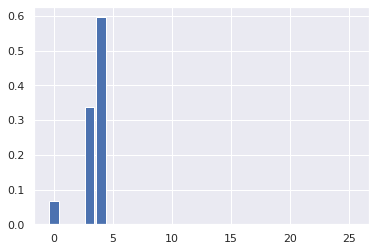

In [169]:
params = ['sexm','dhand','uhndr','hndnsr','eyer','loc1','loc2','loc3','loc4','loc5','loc6','loc7','loc8','loc9','loc10','loc11','loc12','loc13','ecc0','ecc1','ecc2','vf0','vf1','vf2','vf3','vf4']
model = DecisionTreeRegressor()
# fit the model
model.fit(dfclusters[params], np.array(dfclusters['clusters']))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### RSA

In [170]:
array = []
print(df4['sbj'].unique())
for k in df4['sbj'].unique():
    array.append(np.array(dfvf[dfvf['sbj'] == k])[0][1:])
np.shape(array)

[8101004202 8106973112 8101004201 8101005022 8101990531 8101991002
 8101000195 8101993411 8106973111 8101000192 8101993502 8101976831
 8101005262 8101991612 8101005023 8101000194 8101005062 8101991001
 8101991611 8101981632 8101003281 8101004762 8101992522 8101004761
 8101003011 8101005061 8101003611 8101003551 8101990532 8101976832
 8101004121 8101992521 8101005021 8101005261 8101003283 '8101003283'
 '8101000635' '8101004764' '8101003761' '8101981631' '8101004203'
 '8101000634' '8101992751' '8101004763.0' '810100045' '8101003552'
 '8101003792' '8101992752' '8101003012' '8101990402' '810100044'
 '8101000193' '8101003612' '8101993412' '8101003013' '8101990401'
 '8101993501' '8101003793' '8101000191' '8101000631' '8101000633'
 '8101003282' '8101003791' '8101004122' '8101000632']


(65, 5)

In [171]:
dist = np.zeros((65,65))
for i in range(len(array)):
    for j in range(len(array)):
        dist[i][j] = np.linalg.norm(np.array(array[i])-np.array(array[j]))

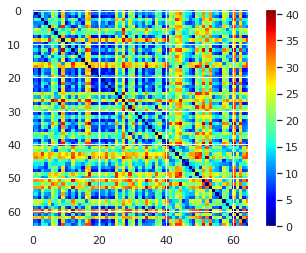

In [172]:
plt.imshow(
    dist, 
    cmap='jet', 
)
plt.colorbar()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


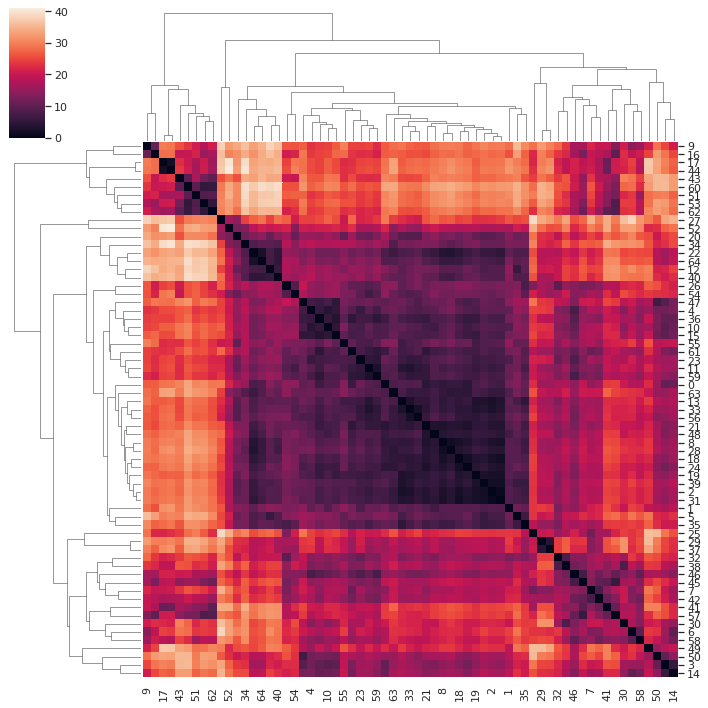

In [128]:
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.clustermap(dist,yticklabels = 1)

In [173]:
cluster1 = [9,16,17,44,43,60,51,53,62]
cluster2 = [27,52]
cluster3 = [20,34,22,64,12,40,26,54,47,436,10,15,55,61,23,11,59,0,63,13,33,56,21,48,8,28,18,24,19,39,2,31,1,5,35]
cluster4 = [25,29,37,32,38,46,45,7,42,41,57,30,6,58,49,50,3,14]

In [174]:
sbjs = df4['sbj'].unique()
clusters = []
for i in range(len(sbjs)):
    tmp = [sbjs[i]]
    if i in cluster1:
        tmp.append('1')
    elif i in cluster2:
        tmp.append('2')
    elif i in cluster3:
        tmp.append('3')
    else:
        tmp.append('4')
    clusters.append(tmp)
clusters

[[8101004202, '3'],
 [8106973112, '3'],
 [8101004201, '3'],
 [8101005022, '4'],
 [8101990531, '4'],
 [8101991002, '3'],
 [8101000195, '4'],
 [8101993411, '4'],
 [8106973111, '3'],
 [8101000192, '1'],
 [8101993502, '3'],
 [8101976831, '3'],
 [8101005262, '3'],
 [8101991612, '3'],
 [8101005023, '4'],
 [8101000194, '3'],
 [8101005062, '1'],
 [8101991001, '1'],
 [8101991611, '3'],
 [8101981632, '3'],
 [8101003281, '3'],
 [8101004762, '3'],
 [8101992522, '3'],
 [8101004761, '3'],
 [8101003011, '3'],
 [8101005061, '4'],
 [8101003611, '3'],
 [8101003551, '2'],
 [8101990532, '3'],
 [8101976832, '4'],
 [8101004121, '4'],
 [8101992521, '3'],
 [8101005021, '4'],
 [8101005261, '3'],
 [8101003283, '3'],
 ['8101003283', '3'],
 ['8101000635', '4'],
 ['8101004764', '4'],
 ['8101003761', '4'],
 ['8101981631', '3'],
 ['8101004203', '3'],
 ['8101000634', '4'],
 ['8101992751', '4'],
 ['8101004763.0', '1'],
 ['810100045', '1'],
 ['8101003552', '4'],
 ['8101003792', '4'],
 ['8101992752', '3'],
 ['8101003012

In [175]:
pd.DataFrame(clusters, columns=['sbj', 'cluster']) 

sbj cluster
0   8101004202       3
1   8106973112       3
2   8101004201       3
3   8101005022       4
4   8101990531       4
..         ...     ...
60  8101000633       1
61  8101003282       3
62  8101003791       1
63  8101004122       3
64  8101000632       3

[65 rows x 2 columns]

In [176]:
dfclusters = pd.merge(df3, pd.DataFrame(clusters, columns=['sbj', 'clusters']) , on='sbj')
dfclusters.head(3)

sbj         rt       lrt       acc  loc  ecc  vf uhnd  dhand sex  \
0  8101004202   925.6644  6.830512  0.608108   10    2   3    r      1   m   
1  8101004202  1163.9952  7.059614  0.608108    6    1   4    r      1   m   
2  8101004202  1023.1118  6.930604  0.608108    9    2   4    r      1   m   

   ... eyer eyel  vf2,loc5  sexm,loc11  sexm,loc9  sexm,uhndr  hndnsr,uhndr  \
0  ...    1    0         0           0          0           1             1   
1  ...    1    0         0           0          0           1             1   
2  ...    1    0         0           0          1           1             1   

   hndnsr,eyer  sexm,eyer  clusters  
0            1          1         3  
1            1          1         3  
2            1          1         3  

[3 rows x 49 columns]

In [177]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

Feature: 0, Score: 0.02792
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.00017
Feature: 3, Score: 0.58424
Feature: 4, Score: 0.38484
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00004
Feature: 7, Score: 0.00020
Feature: 8, Score: 0.00026
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00030
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.00070
Feature: 13, Score: 0.00048
Feature: 14, Score: 0.00015
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00004
Feature: 17, Score: 0.00023
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00010
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00004
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00007


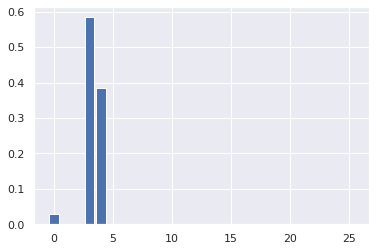

In [178]:
params = ['sexm','dhand','uhndr','hndnsr','eyer','loc1','loc2','loc3','loc4','loc5','loc6','loc7','loc8','loc9','loc10','loc11','loc12','loc13','ecc0','ecc1','ecc2','vf0','vf1','vf2','vf3','vf4']
model = DecisionTreeRegressor()
# fit the model
model.fit(dfclusters[params], np.array(dfclusters['clusters']))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()